In [1]:
import openmeteo_requests

import requests_cache
import pandas as pd
from retry_requests import retry





In [2]:
cache_session = requests_cache.CachedSession('.cache', expire_after = 3600)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://air-quality-api.open-meteo.com/v1/air-quality"
params = {
	"latitude": 52.52,
	"longitude": 13.41,
	"current": ["uv_index", "uv_index_clear_sky"],
	"hourly": "carbon_monoxide",
	"timezone": "America/New_York",
	"past_days": 92,
	"forecast_days": 7
}
responses = openmeteo.weather_api(url, params=params)

# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
print(f"Elevation {response.Elevation()} m asl")
print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

# Current values. The order of variables needs to be the same as requested.
current = response.Current()
current_uv_index = current.Variables(0).Value()
current_uv_index_clear_sky = current.Variables(1).Value()

print(f"Current time {current.Time()}")
print(f"Current uv_index {current_uv_index}")
print(f"Current uv_index_clear_sky {current_uv_index_clear_sky}")

# Process hourly data. The order of variables needs to be the same as requested.
hourly = response.Hourly()
hourly_carbon_monoxide = hourly.Variables(0).ValuesAsNumpy()

hourly_data = {"date": pd.date_range(
	start = pd.to_datetime(hourly.Time(), unit = "s", utc = True),
	end = pd.to_datetime(hourly.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = hourly.Interval()),
	inclusive = "left"
)}
hourly_data["carbon_monoxide"] = hourly_carbon_monoxide

hourly_dataframe = pd.DataFrame(data = hourly_data)
print(hourly_dataframe)

ConnectionError: HTTPSConnectionPool(host='air-quality-api.open-meteo.com', port=443): Max retries exceeded with url: /v1/air-quality?latitude=52.52&longitude=13.41&current=uv_index&current=uv_index_clear_sky&hourly=carbon_monoxide&timezone=America%2FNew_York&past_days=92&forecast_days=7&format=flatbuffers (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001A3820AAA10>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

In [ ]:
import matplotlib.pyplot as plt

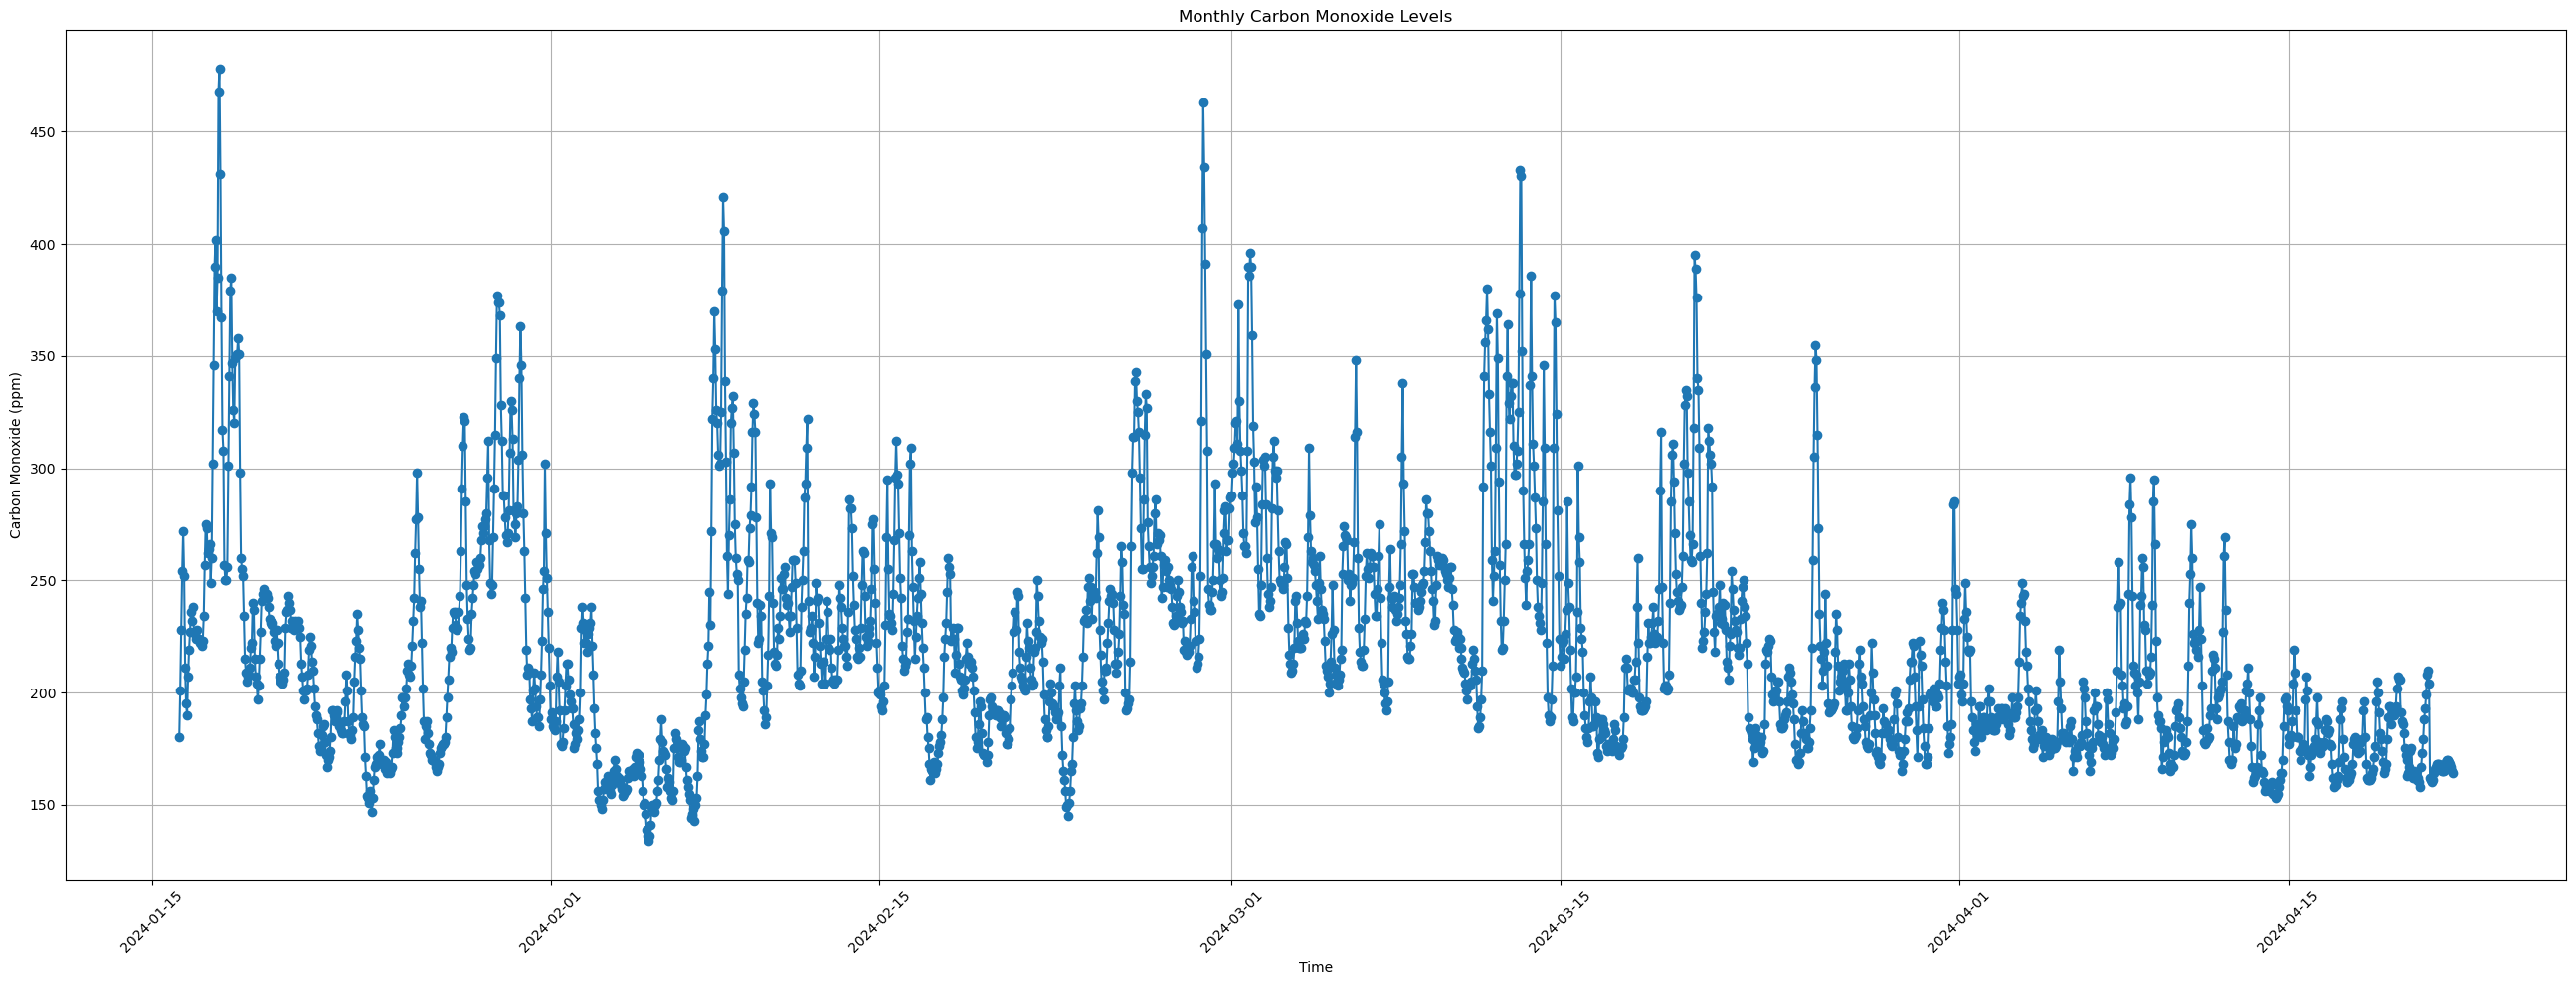

In [35]:
plt.figure(figsize=(26, 10))
plt.plot(hourly_dataframe['date'], hourly_dataframe['carbon_monoxide'], marker='o', linestyle='-')
plt.title('Monthly Carbon Monoxide Levels')
plt.xlabel('Time')
plt.ylabel('Carbon Monoxide (ppm)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

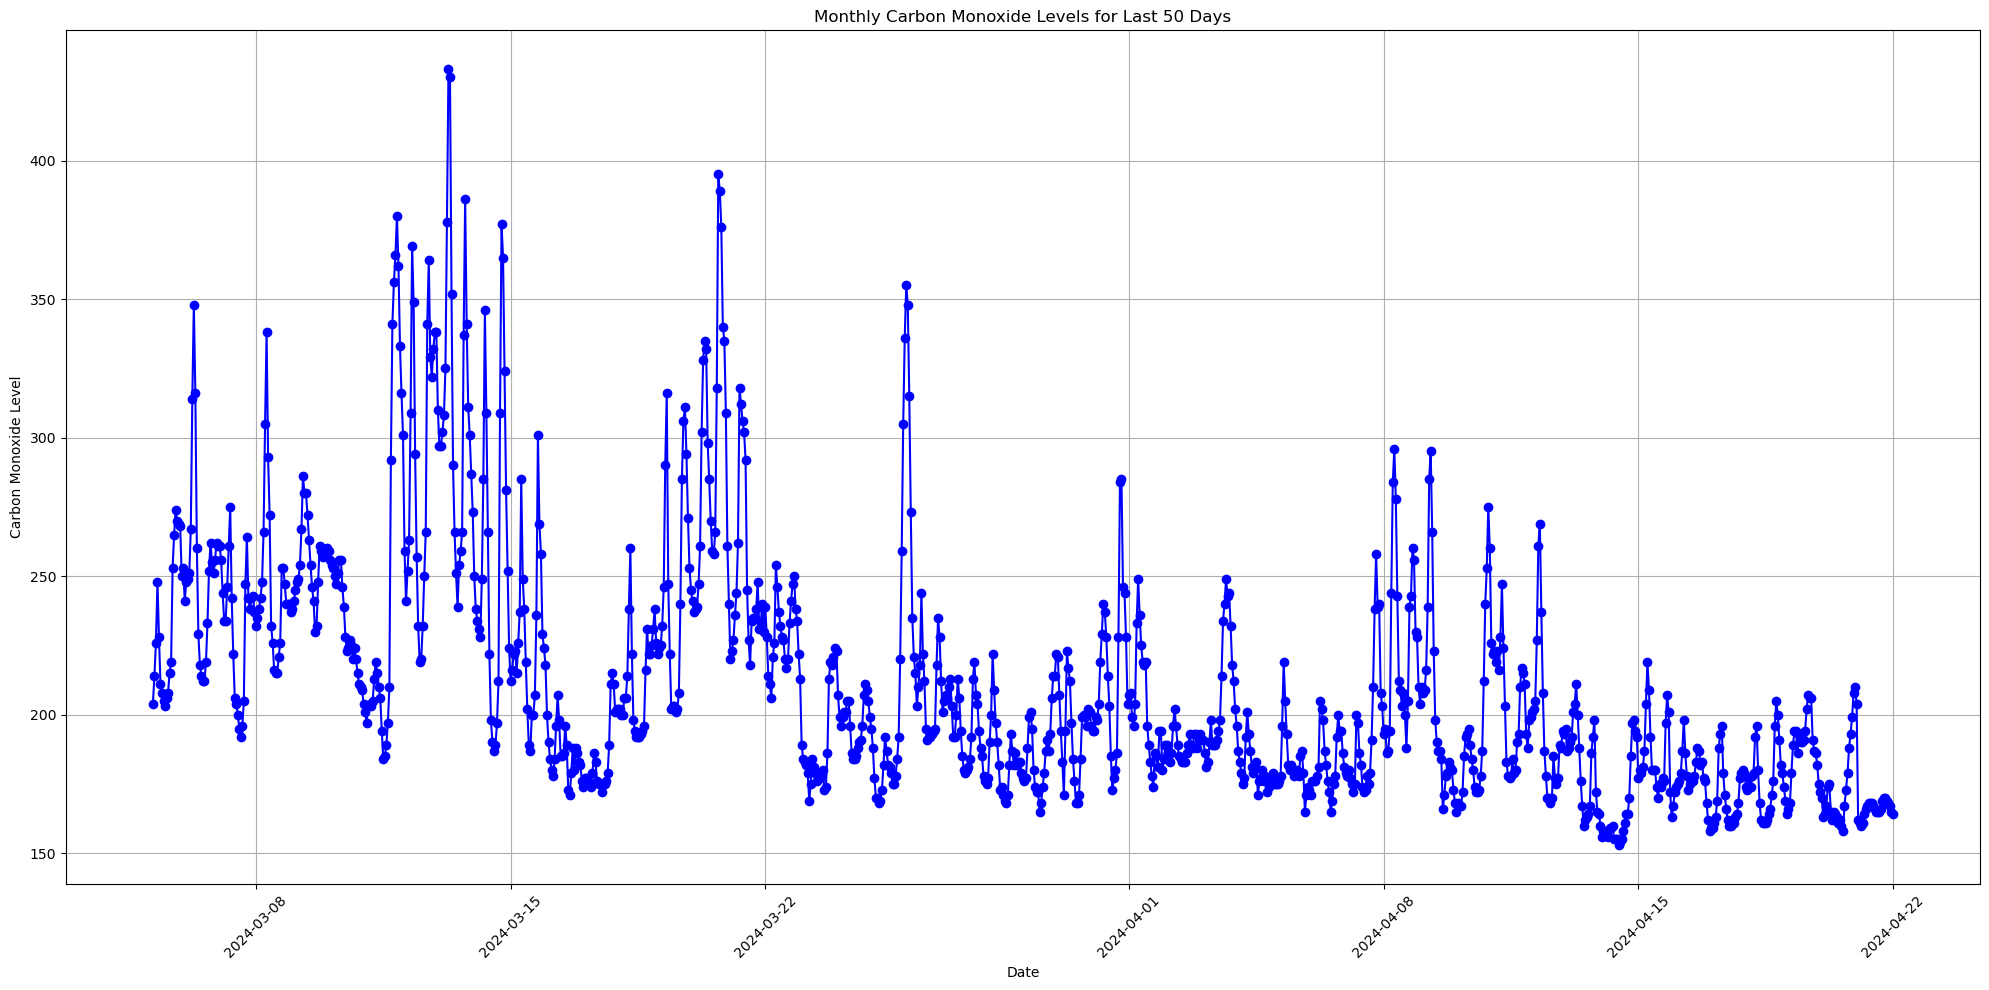

In [36]:
last_50_days_data = hourly_dataframe.tail(24 * 50)  # Assuming hourly data

# Plotting
plt.figure(figsize=(20, 10))
plt.plot(last_50_days_data['date'], last_50_days_data['carbon_monoxide'], color='blue', marker='o', linestyle='-')
plt.title('Monthly Carbon Monoxide Levels for Last 50 Days')
plt.xlabel('Date')
plt.ylabel('Carbon Monoxide Level')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

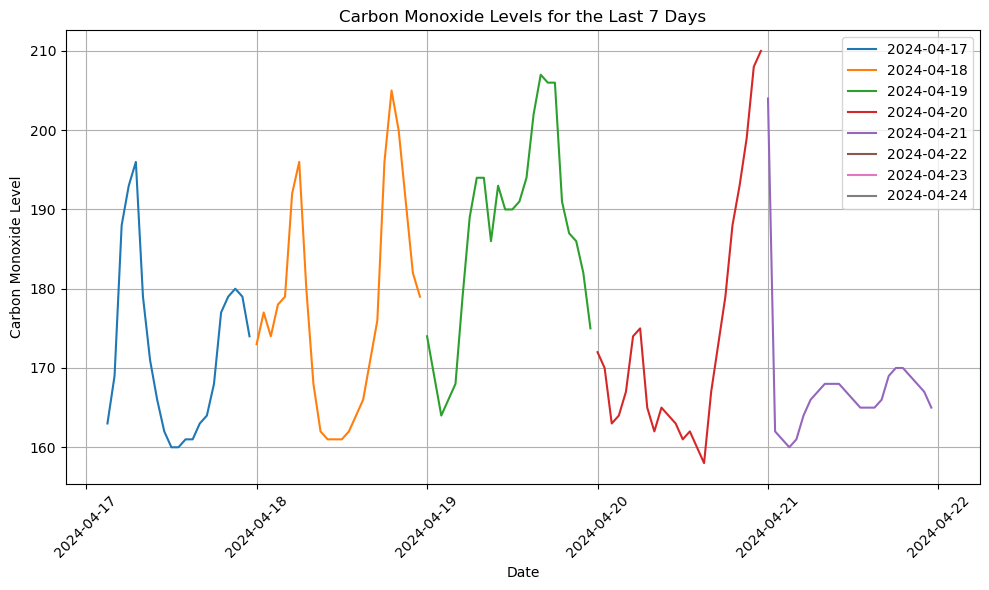

In [37]:
last_7_days_data = hourly_dataframe[hourly_dataframe['date'] >= hourly_dataframe['date'].max() - pd.Timedelta(days=7)]

# Plotting
plt.figure(figsize=(10, 6))
for i, day_data in last_7_days_data.groupby(last_7_days_data['date'].dt.date):
    plt.plot(day_data['date'], day_data['carbon_monoxide'], label=i.strftime('%Y-%m-%d'))

plt.title('Carbon Monoxide Levels for the Last 7 Days')
plt.xlabel('Date')
plt.ylabel('Carbon Monoxide Level')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [7]:
cache_session = requests_cache.CachedSession('.cache', expire_after = 3600)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://air-quality-api.open-meteo.com/v1/air-quality"
params = {
	"latitude": 52.52,
	"longitude": 13.41,
	"current": ["pm10", "pm2_5"],
	"hourly": ["pm10", "pm2_5"],
	"timezone": "America/New_York",
	"past_days": 92,
	"forecast_days": 7
}
responses = openmeteo.weather_api(url, params=params)

# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
print(f"Elevation {response.Elevation()} m asl")
print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

# Current values. The order of variables needs to be the same as requested.
current = response.Current()
current_pm10 = current.Variables(0).Value()
current_pm2_5 = current.Variables(1).Value()

print(f"Current time {current.Time()}")
print(f"Current pm10 {current_pm10}")
print(f"Current pm2_5 {current_pm2_5}")

# Process hourly data. The order of variables needs to be the same as requested.
hourly = response.Hourly()
hourly_pm10 = hourly.Variables(0).ValuesAsNumpy()
hourly_pm2_5 = hourly.Variables(1).ValuesAsNumpy()

hourly_data = {"date": pd.date_range(
	start = pd.to_datetime(hourly.Time(), unit = "s", utc = True),
	end = pd.to_datetime(hourly.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = hourly.Interval()),
	inclusive = "left"
)}
hourly_data["pm10"] = hourly_pm10
hourly_data["pm2_5"] = hourly_pm2_5

hourly_dataframe = pd.DataFrame(data = hourly_data)
print(hourly_dataframe)


Coordinates 52.54999542236328°N 13.450000762939453°E
Elevation 38.0 m asl
Timezone b'America/New_York' b'EDT'
Timezone difference to GMT+0 -14400 s
Current time 1713358800
Current pm10 6.199999809265137
Current pm2_5 5.199999809265137
                          date  pm10  pm2_5
0    2024-01-16 04:00:00+00:00   6.6    4.7
1    2024-01-16 05:00:00+00:00   7.8    5.6
2    2024-01-16 06:00:00+00:00   9.6    6.9
3    2024-01-16 07:00:00+00:00  11.6    8.6
4    2024-01-16 08:00:00+00:00  14.6   10.6
...                        ...   ...    ...
2371 2024-04-23 23:00:00+00:00   NaN    NaN
2372 2024-04-24 00:00:00+00:00   NaN    NaN
2373 2024-04-24 01:00:00+00:00   NaN    NaN
2374 2024-04-24 02:00:00+00:00   NaN    NaN
2375 2024-04-24 03:00:00+00:00   NaN    NaN

[2376 rows x 3 columns]


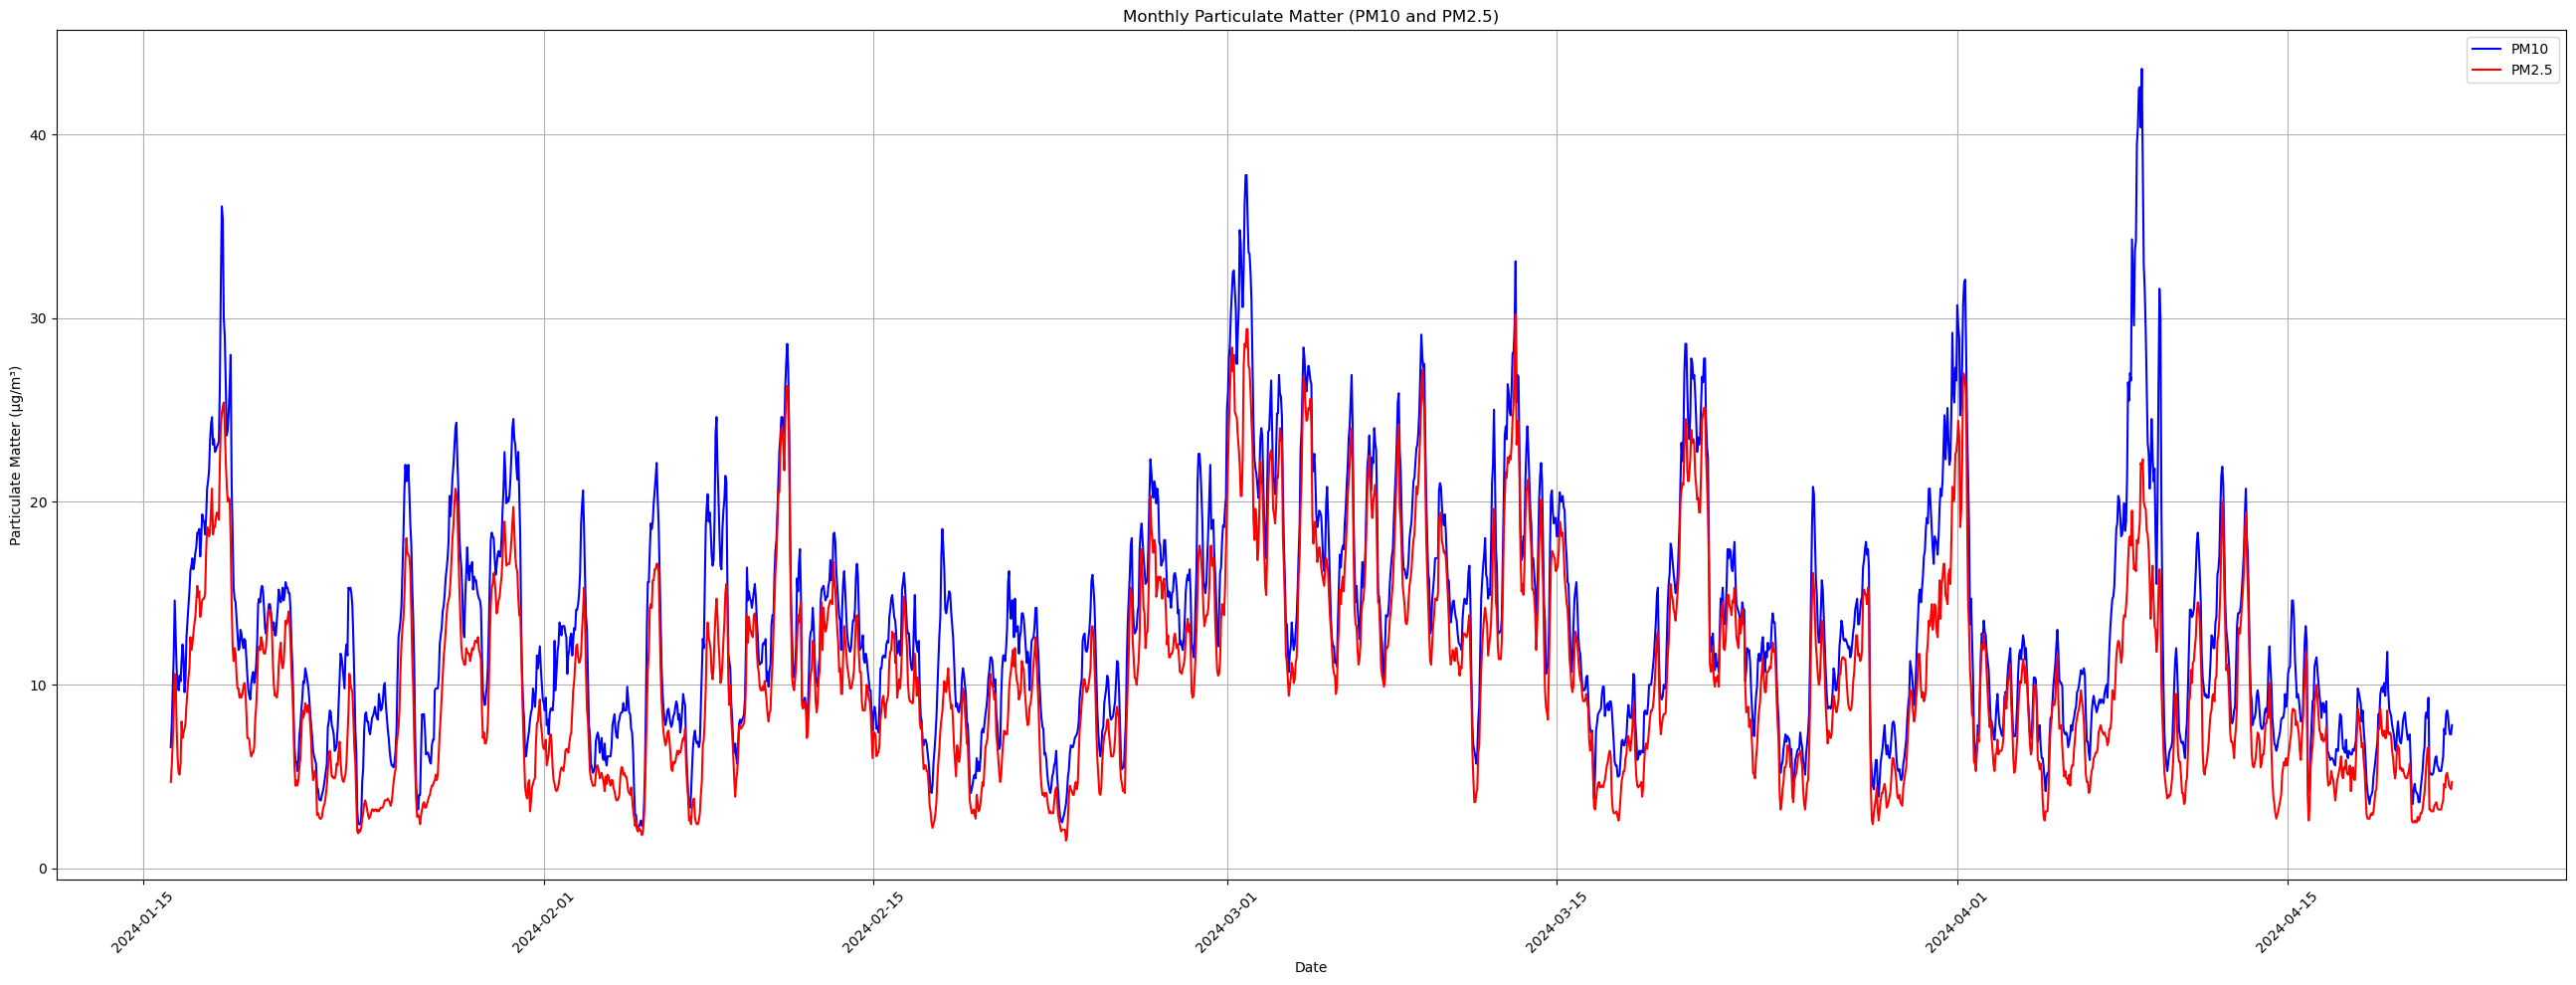

In [8]:
plt.figure(figsize=(26, 10))

# Plot PM10
plt.plot(hourly_dataframe['date'], hourly_dataframe['pm10'], label='PM10', color='blue')

# Plot PM2.5
plt.plot(hourly_dataframe['date'], hourly_dataframe['pm2_5'], label='PM2.5', color='red')

plt.title('Monthly Particulate Matter (PM10 and PM2.5)')
plt.xlabel('Date')
plt.ylabel('Particulate Matter (µg/m³)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

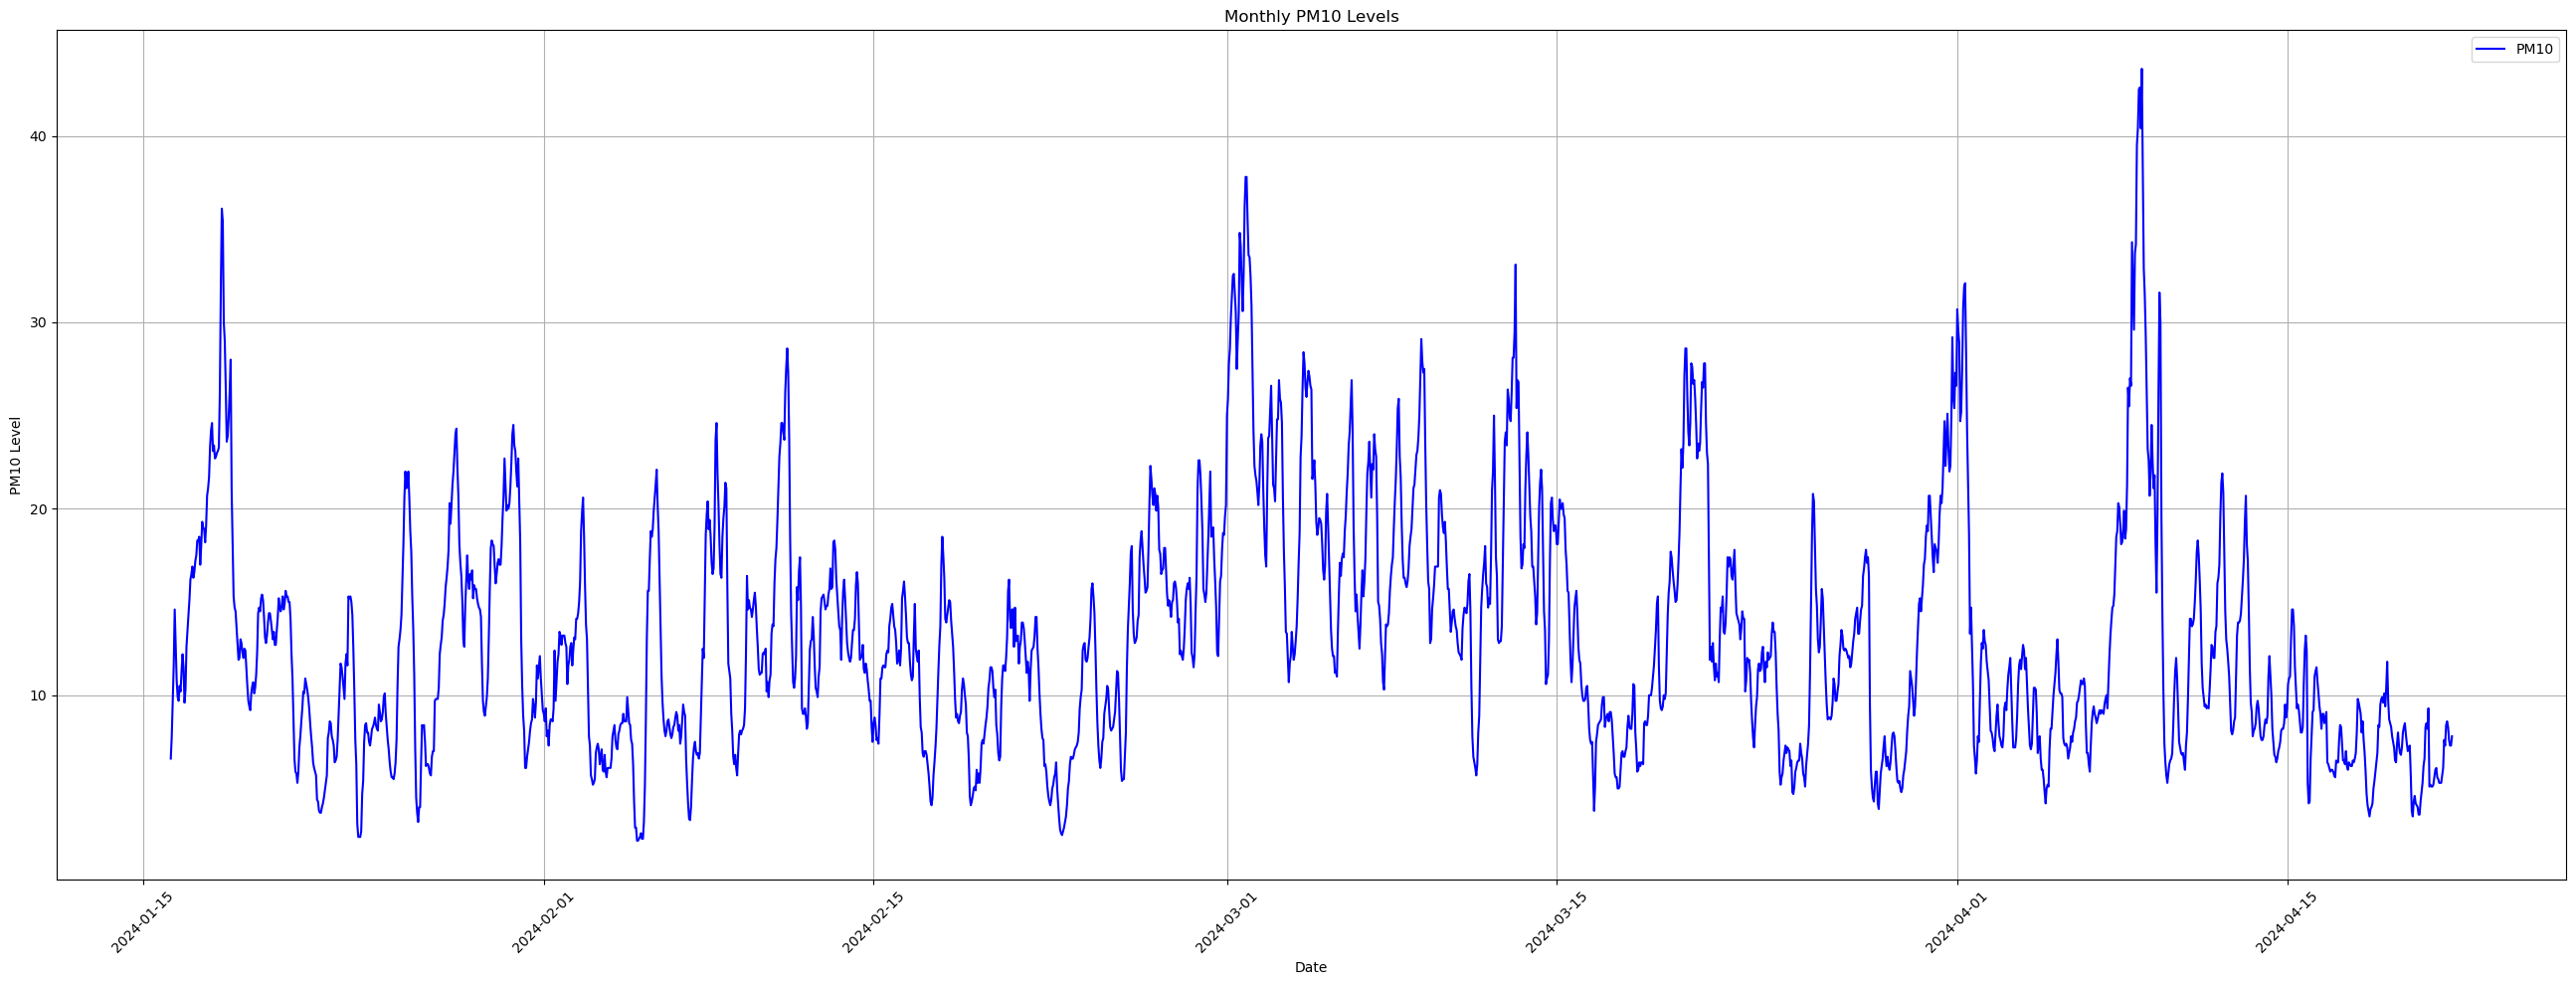

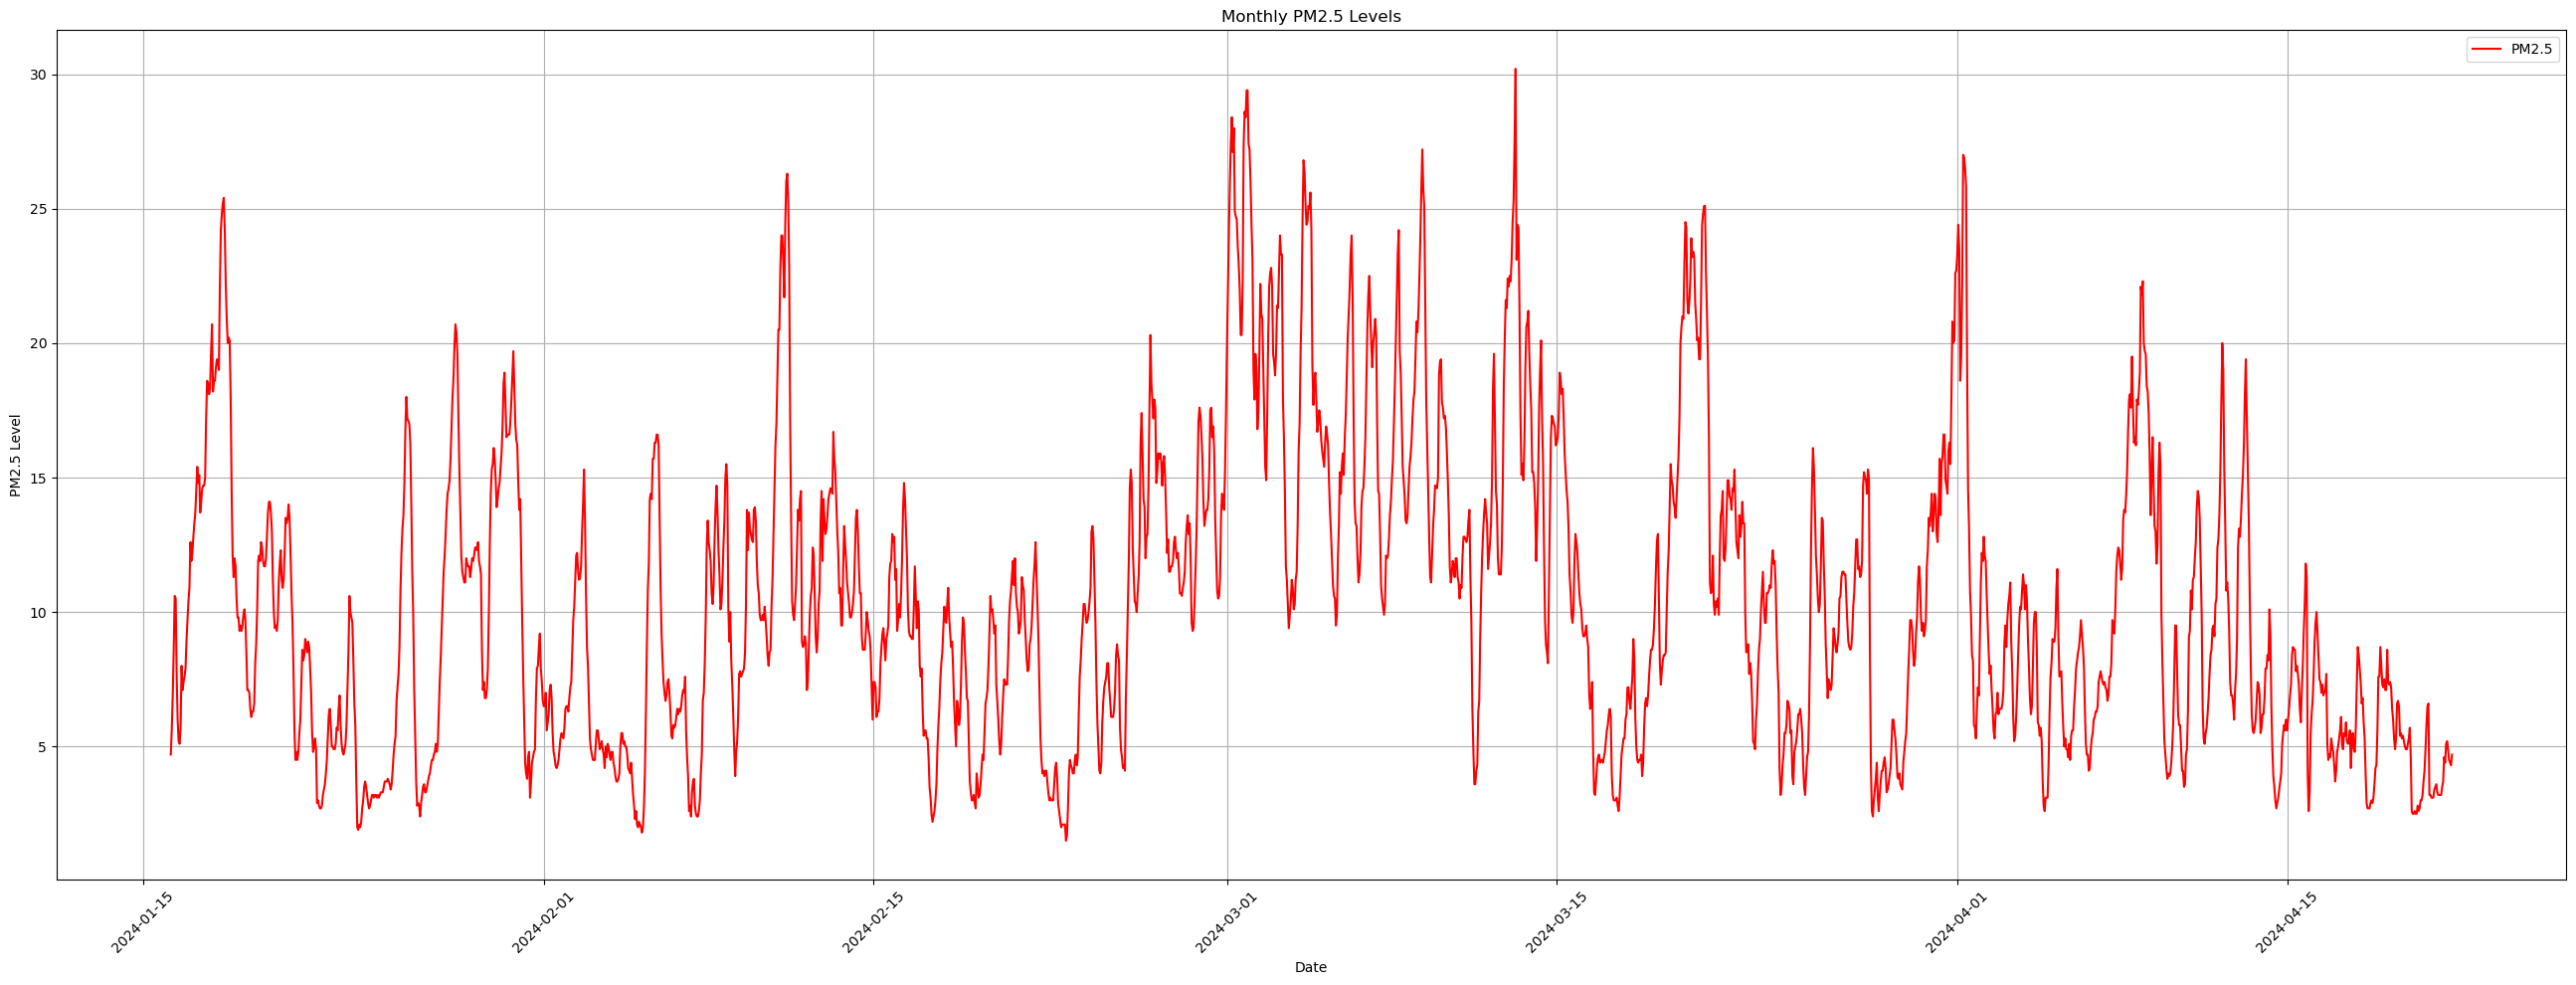

In [9]:
import matplotlib.pyplot as plt

# Plotting PM10
plt.figure(figsize=(26, 10))
plt.plot(hourly_dataframe['date'], hourly_dataframe['pm10'], label='PM10', color='blue')

plt.title('Monthly PM10 Levels')
plt.xlabel('Date')
plt.ylabel('PM10 Level')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting PM2.5
plt.figure(figsize=(26, 10))
plt.plot(hourly_dataframe['date'], hourly_dataframe['pm2_5'], label='PM2.5', color='red')

plt.title('Monthly PM2.5 Levels')
plt.xlabel('Date')
plt.ylabel('PM2.5 Level')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [10]:
import openmeteo_requests

import requests_cache
import pandas as pd
from retry_requests import retry

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = 3600)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://air-quality-api.open-meteo.com/v1/air-quality"
params = {
	"latitude": 52.52,
	"longitude": 13.41,
	"current": ["ozone", "uv_index"],
	"hourly": ["ozone", "uv_index"],
	"timezone": "America/New_York",
	"past_days": 92,
	"forecast_days": 7
}
responses = openmeteo.weather_api(url, params=params)

# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
print(f"Elevation {response.Elevation()} m asl")
print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

# Current values. The order of variables needs to be the same as requested.
current = response.Current()
current_ozone = current.Variables(0).Value()
current_uv_index = current.Variables(1).Value()

print(f"Current time {current.Time()}")
print(f"Current ozone {current_ozone}")
print(f"Current uv_index {current_uv_index}")

# Process hourly data. The order of variables needs to be the same as requested.
hourly = response.Hourly()
hourly_ozone = hourly.Variables(0).ValuesAsNumpy()
hourly_uv_index = hourly.Variables(1).ValuesAsNumpy()

hourly_data = {"date": pd.date_range(
	start = pd.to_datetime(hourly.Time(), unit = "s", utc = True),
	end = pd.to_datetime(hourly.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = hourly.Interval()),
	inclusive = "left"
)}
hourly_data["ozone"] = hourly_ozone
hourly_data["uv_index"] = hourly_uv_index

hourly_dataframe = pd.DataFrame(data = hourly_data)
print(hourly_dataframe)


Coordinates 52.54999542236328°N 13.450000762939453°E
Elevation 38.0 m asl
Timezone b'America/New_York' b'EDT'
Timezone difference to GMT+0 -14400 s
Current time 1713358800
Current ozone 87.0
Current uv_index 1.2000000476837158
                          date  ozone  uv_index
0    2024-01-16 04:00:00+00:00   51.0       0.0
1    2024-01-16 05:00:00+00:00   49.0       0.0
2    2024-01-16 06:00:00+00:00   32.0       0.0
3    2024-01-16 07:00:00+00:00   23.0       0.0
4    2024-01-16 08:00:00+00:00   19.0       0.1
...                        ...    ...       ...
2371 2024-04-23 23:00:00+00:00    NaN       NaN
2372 2024-04-24 00:00:00+00:00    NaN       NaN
2373 2024-04-24 01:00:00+00:00    NaN       NaN
2374 2024-04-24 02:00:00+00:00    NaN       NaN
2375 2024-04-24 03:00:00+00:00    NaN       NaN

[2376 rows x 3 columns]


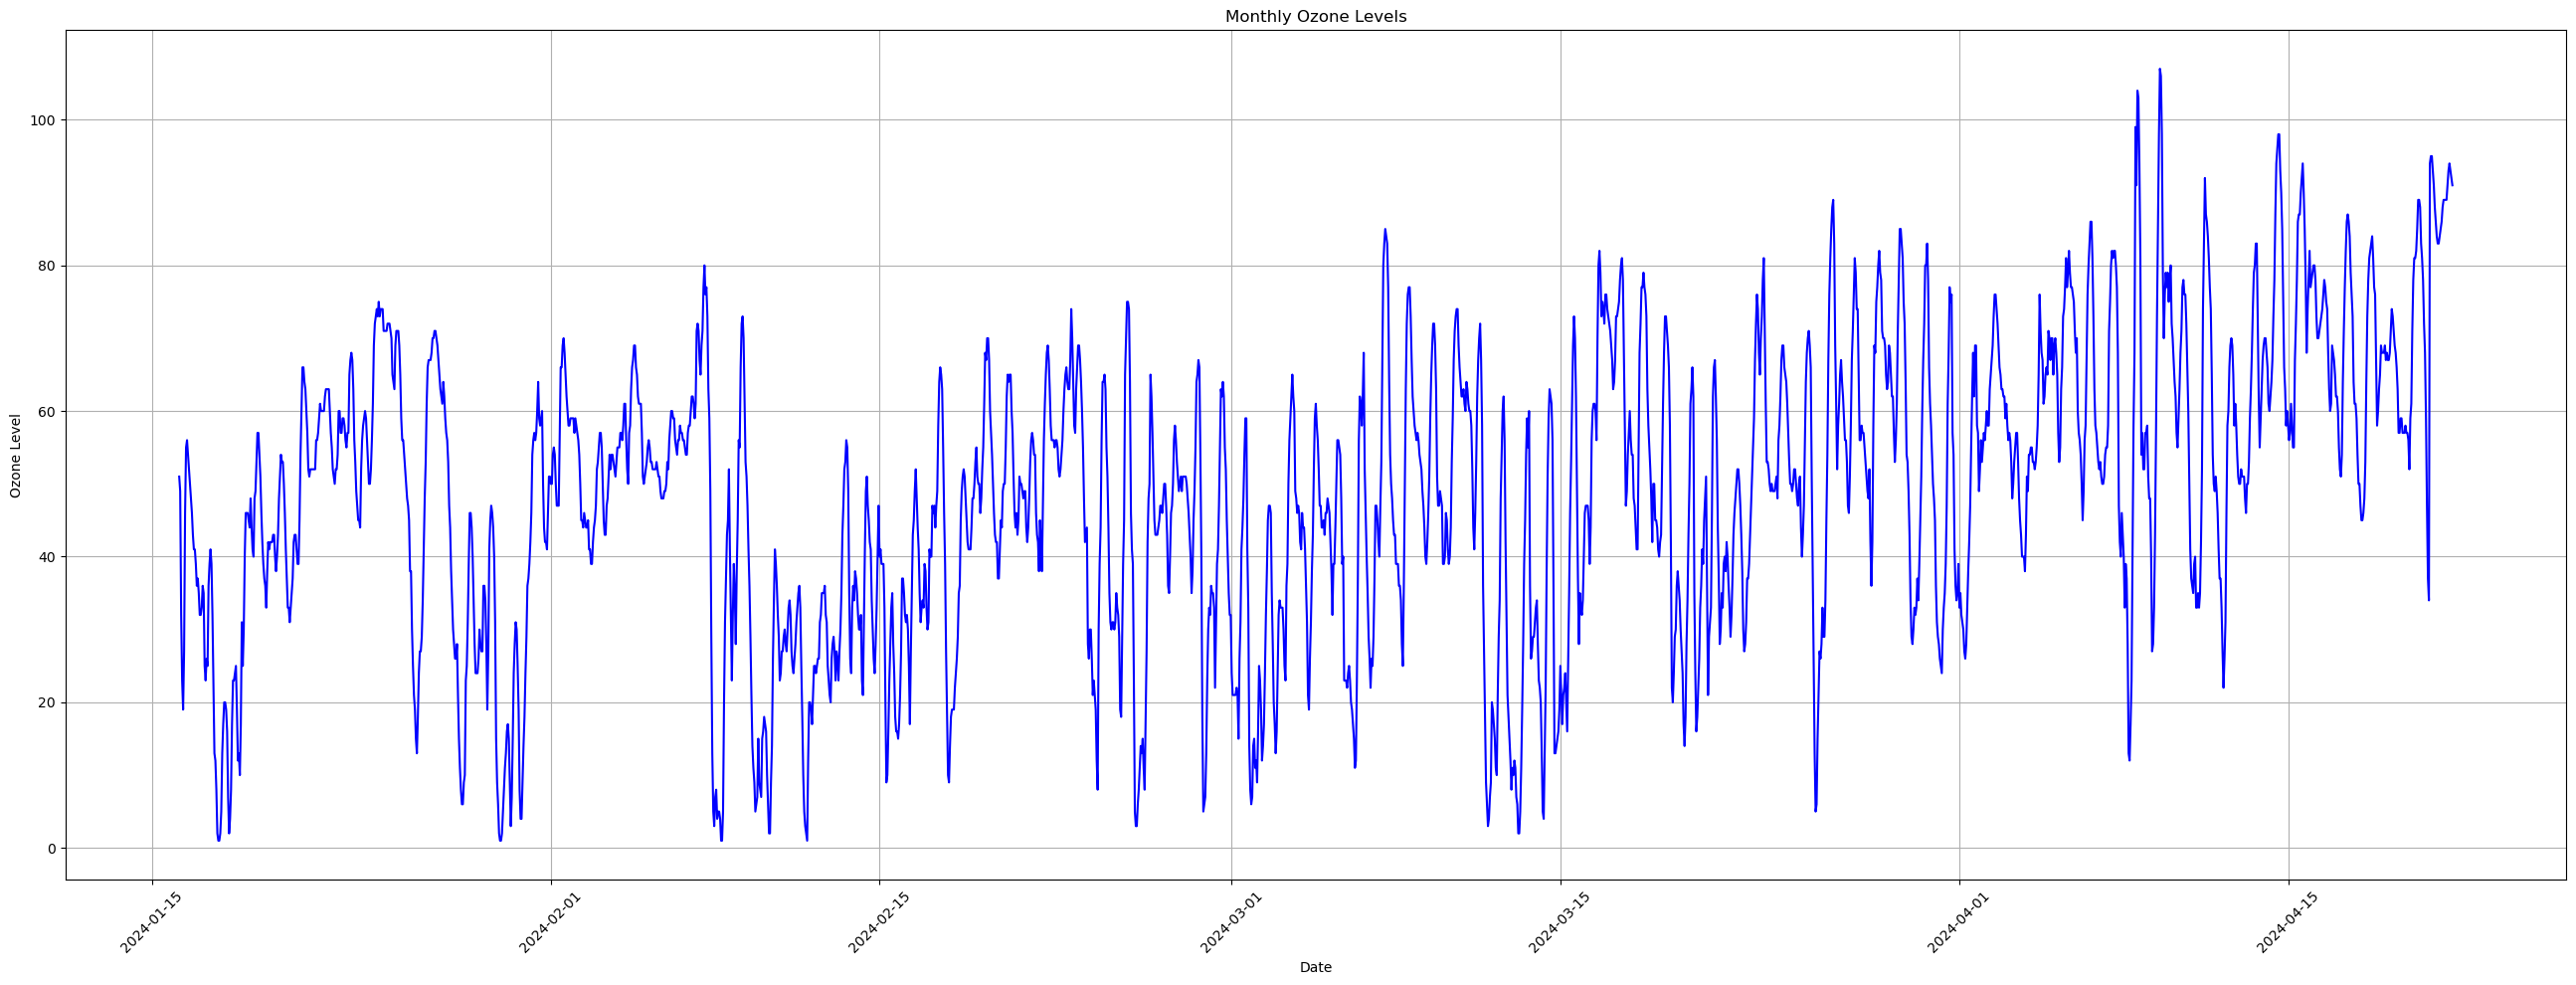

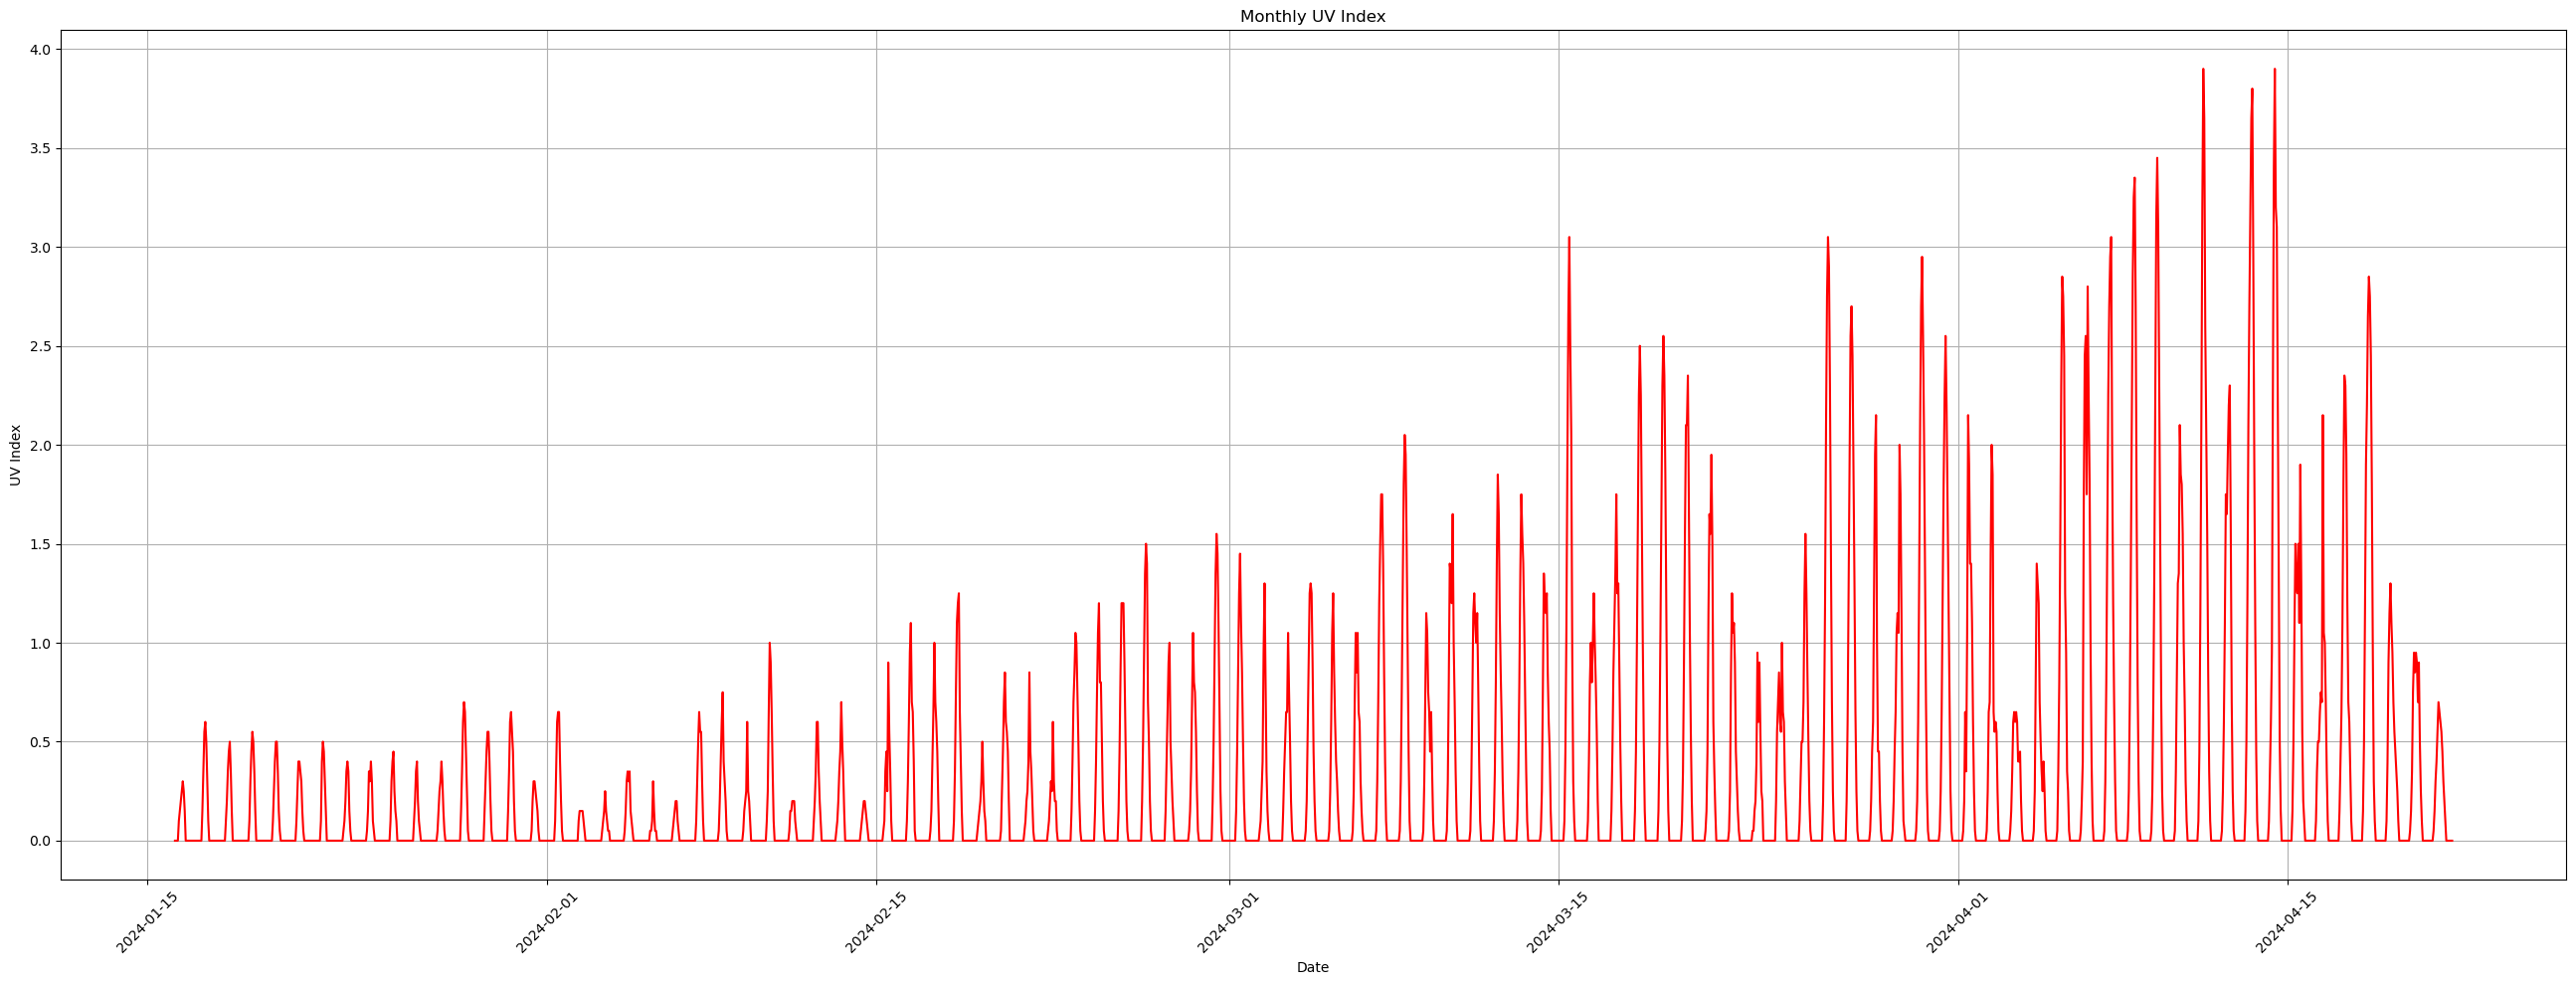

In [11]:
plt.figure(figsize=(26, 10))
plt.plot(hourly_dataframe['date'], hourly_dataframe['ozone'], color='blue')
plt.title('Monthly Ozone Levels')
plt.xlabel('Date')
plt.ylabel('Ozone Level')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting UV Index
plt.figure(figsize=(26, 10))
plt.plot(hourly_dataframe['date'], hourly_dataframe['uv_index'], color='red')
plt.title('Monthly UV Index')
plt.xlabel('Date')
plt.ylabel('UV Index')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
import openmeteo_requests

import requests_cache
import pandas as pd
from retry_requests import retry

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = 3600)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://air-quality-api.open-meteo.com/v1/air-quality"
params = {
	"latitude": 52.52,
	"longitude": 13.41,
	"current": ["nitrogen_dioxide", "ammonia"],
	"hourly": ["nitrogen_dioxide", "ammonia"],
	"timezone": "America/New_York",
	"past_days": 92,
	"forecast_days": 7
}
responses = openmeteo.weather_api(url, params=params)

# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
print(f"Elevation {response.Elevation()} m asl")
print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

# Current values. The order of variables needs to be the same as requested.
current = response.Current()
current_nitrogen_dioxide = current.Variables(0).Value()
current_ammonia = current.Variables(1).Value()

print(f"Current time {current.Time()}")
print(f"Current nitrogen_dioxide {current_nitrogen_dioxide}")
print(f"Current ammonia {current_ammonia}")

# Process hourly data. The order of variables needs to be the same as requested.
hourly = response.Hourly()
hourly_nitrogen_dioxide = hourly.Variables(0).ValuesAsNumpy()
hourly_ammonia = hourly.Variables(1).ValuesAsNumpy()

hourly_data = {"date": pd.date_range(
	start = pd.to_datetime(hourly.Time(), unit = "s", utc = True),
	end = pd.to_datetime(hourly.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = hourly.Interval()),
	inclusive = "left"
)}
hourly_data["nitrogen_dioxide"] = hourly_nitrogen_dioxide
hourly_data["ammonia"] = hourly_ammonia

hourly_dataframe = pd.DataFrame(data = hourly_data)
print(hourly_dataframe)


Coordinates 52.54999542236328°N 13.450000762939453°E
Elevation 38.0 m asl
Timezone b'America/New_York' b'EDT'
Timezone difference to GMT+0 -14400 s
Current time 1713358800
Current nitrogen_dioxide 4.0
Current ammonia 1.7000000476837158
                          date  nitrogen_dioxide  ammonia
0    2024-01-16 04:00:00+00:00         10.000000      0.4
1    2024-01-16 05:00:00+00:00         16.299999      0.5
2    2024-01-16 06:00:00+00:00         27.900000      0.8
3    2024-01-16 07:00:00+00:00         39.000000      1.0
4    2024-01-16 08:00:00+00:00         45.599998      1.0
...                        ...               ...      ...
2371 2024-04-23 23:00:00+00:00               NaN      NaN
2372 2024-04-24 00:00:00+00:00               NaN      NaN
2373 2024-04-24 01:00:00+00:00               NaN      NaN
2374 2024-04-24 02:00:00+00:00               NaN      NaN
2375 2024-04-24 03:00:00+00:00               NaN      NaN

[2376 rows x 3 columns]


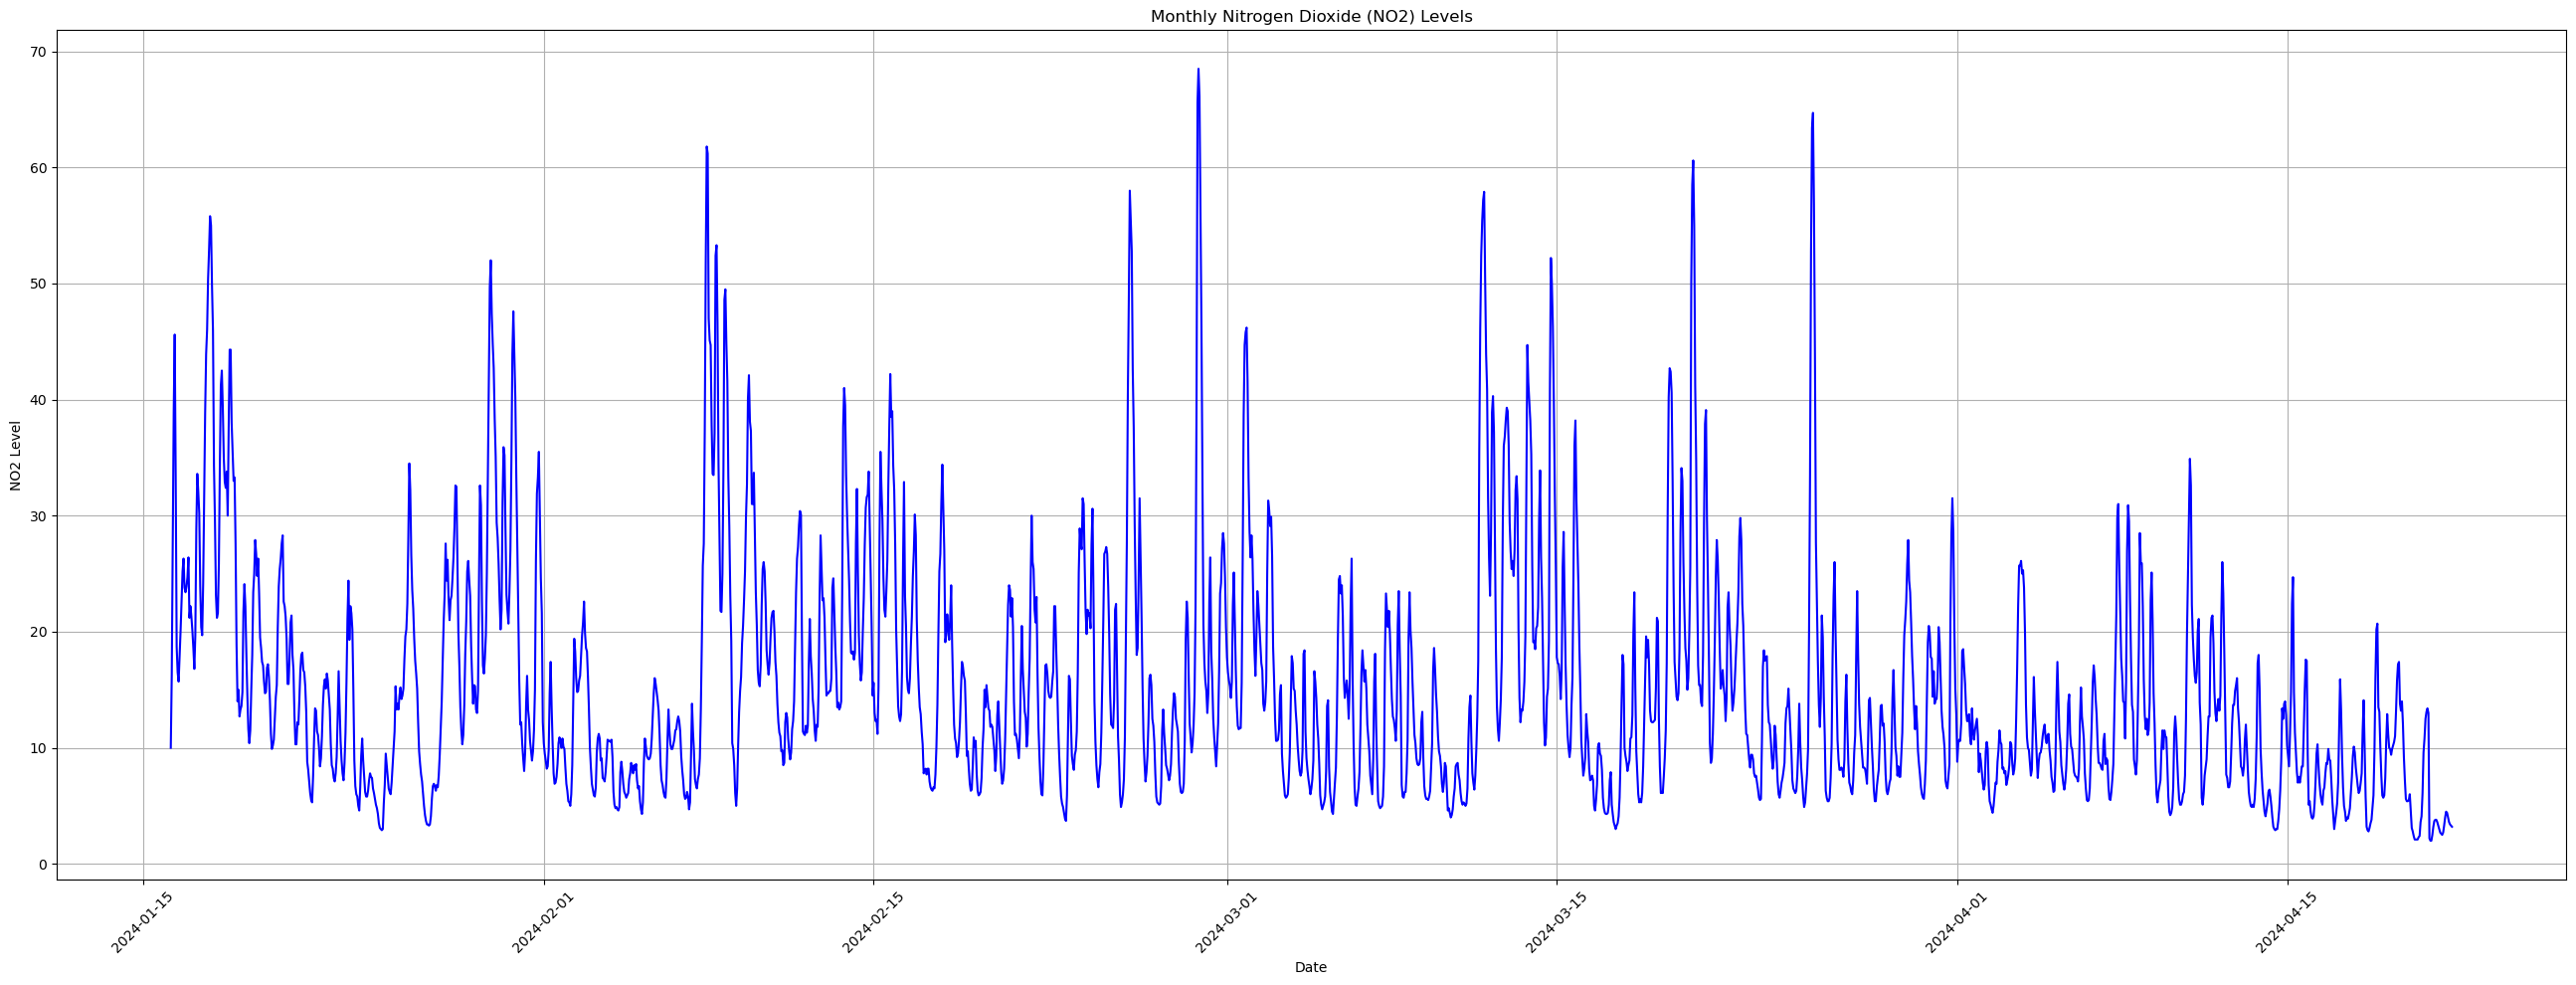

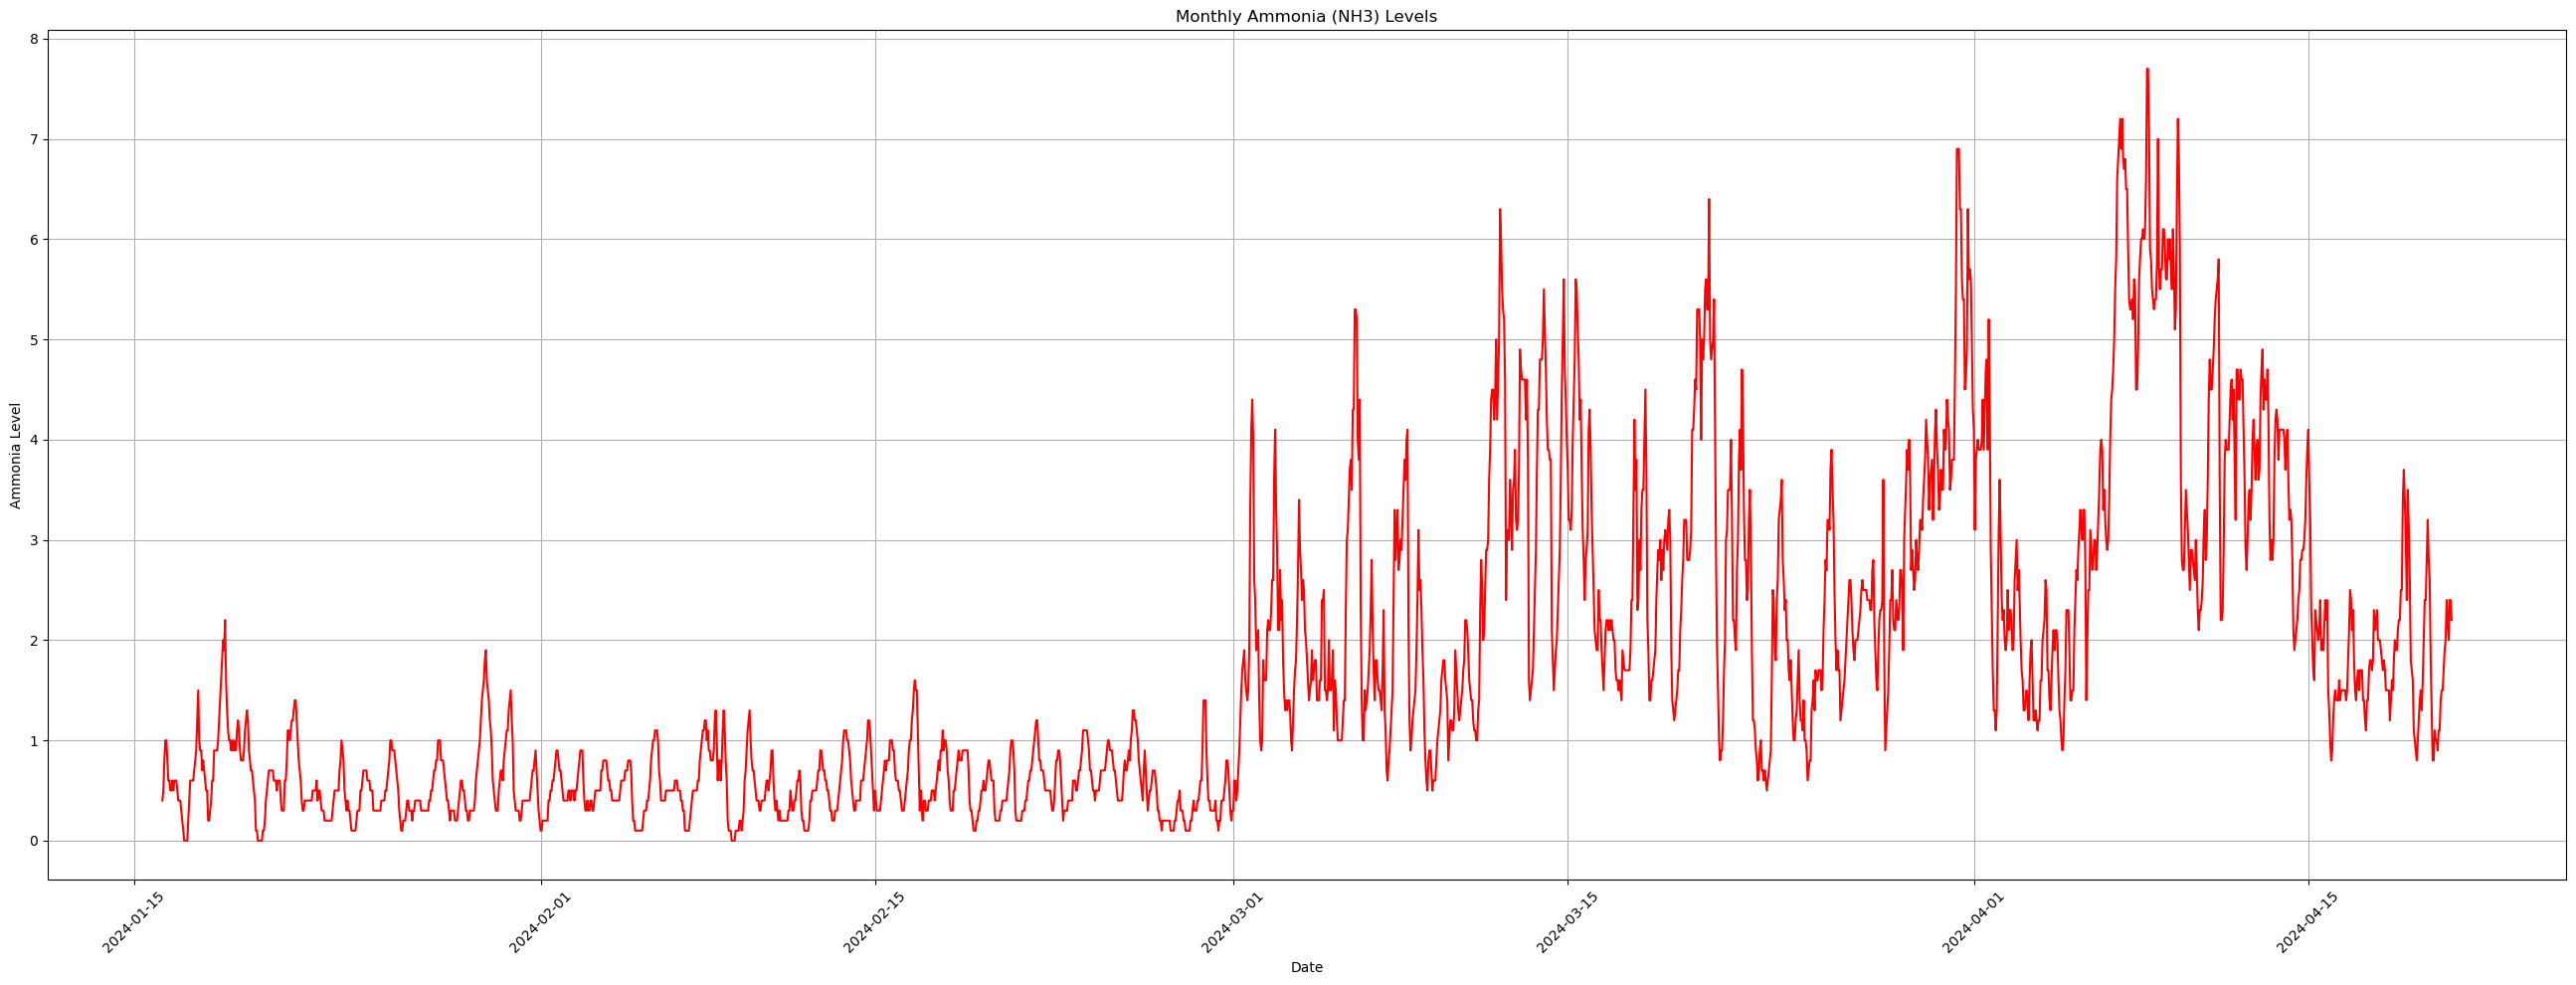

In [13]:
plt.figure(figsize=(26, 10))
plt.plot(hourly_dataframe['date'], hourly_dataframe['nitrogen_dioxide'], color='blue')
plt.title('Monthly Nitrogen Dioxide (NO2) Levels')
plt.xlabel('Date')
plt.ylabel('NO2 Level')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting Ammonia (NH3)
plt.figure(figsize=(26, 10))
plt.plot(hourly_dataframe['date'], hourly_dataframe['ammonia'], color='red')
plt.title('Monthly Ammonia (NH3) Levels')
plt.xlabel('Date')
plt.ylabel('Ammonia Level')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
import openmeteo_requests

import requests_cache
import pandas as pd
from retry_requests import retry

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = 3600)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://climate-api.open-meteo.com/v1/climate"
params = {
	"latitude": 52.52,
	"longitude": 13.41,
	"start_date": "1950-01-01",
	"end_date": "2050-12-31",
	"models": ["CMCC_CM2_VHR4", "FGOALS_f3_H", "HiRAM_SIT_HR", "MRI_AGCM3_2_S", "EC_Earth3P_HR", "MPI_ESM1_2_XR", "NICAM16_8S"],
	"timezone": "America/New_York",
	"daily": ["temperature_2m_mean", "wind_speed_10m_mean", "relative_humidity_2m_mean", "precipitation_sum"]
}
responses = openmeteo.weather_api(url, params=params)

# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
print(f"Elevation {response.Elevation()} m asl")
print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

# Process daily data. The order of variables needs to be the same as requested.
daily = response.Daily()
daily_temperature_2m_mean = daily.Variables(0).ValuesAsNumpy()
daily_wind_speed_10m_mean = daily.Variables(1).ValuesAsNumpy()
daily_relative_humidity_2m_mean = daily.Variables(2).ValuesAsNumpy()
daily_precipitation_sum = daily.Variables(3).ValuesAsNumpy()

daily_data = {"date": pd.date_range(
	start = pd.to_datetime(daily.Time(), unit = "s", utc = True),
	end = pd.to_datetime(daily.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = daily.Interval()),
	inclusive = "left"
)}
daily_data["temperature_2m_mean"] = daily_temperature_2m_mean
daily_data["wind_speed_10m_mean"] = daily_wind_speed_10m_mean
daily_data["relative_humidity_2m_mean"] = daily_relative_humidity_2m_mean
daily_data["precipitation_sum"] = daily_precipitation_sum

daily_dataframe = pd.DataFrame(data = daily_data)
print(daily_dataframe)


Coordinates 52.5°N 13.400009155273438°E
Elevation 38.0 m asl
Timezone None None
Timezone difference to GMT+0 0 s
                           date  temperature_2m_mean  wind_speed_10m_mean  \
0     1950-01-01 00:00:00+00:00            -3.266310            21.916893   
1     1950-01-02 00:00:00+00:00            -1.464694            11.531696   
2     1950-01-03 00:00:00+00:00            -0.163077            10.087161   
3     1950-01-04 00:00:00+00:00             0.938540             6.914803   
4     1950-01-05 00:00:00+00:00            -4.809843            13.249327   
...                         ...                  ...                  ...   
36885 2050-12-27 00:00:00+00:00             2.641850            13.711460   
36886 2050-12-28 00:00:00+00:00             3.671248            18.047308   
36887 2050-12-29 00:00:00+00:00             2.200646            21.202288   
36888 2050-12-30 00:00:00+00:00             1.880044            25.212872   
36889 2050-12-31 00:00:00+00:00         

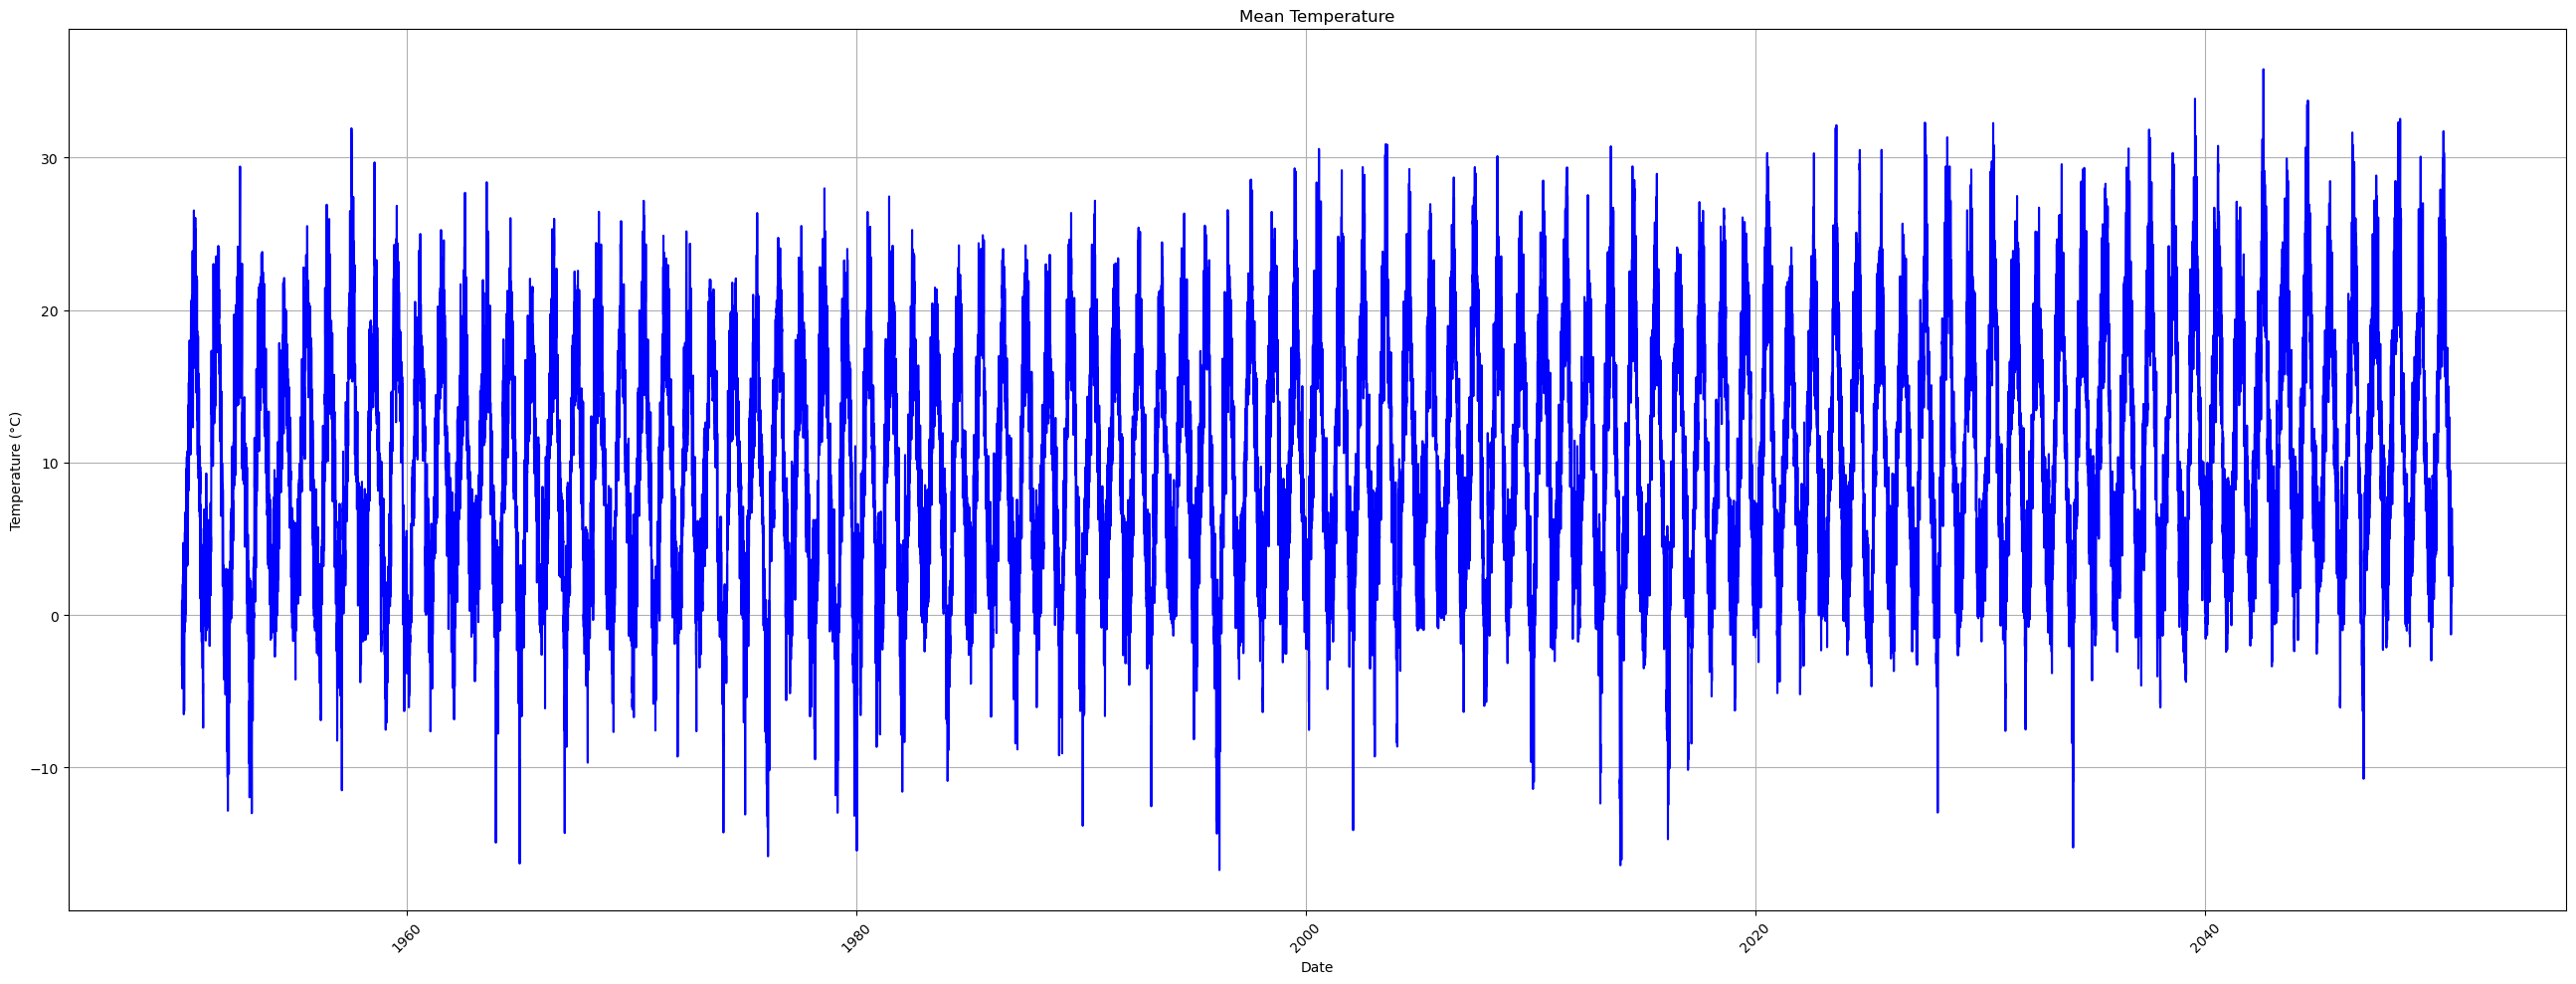

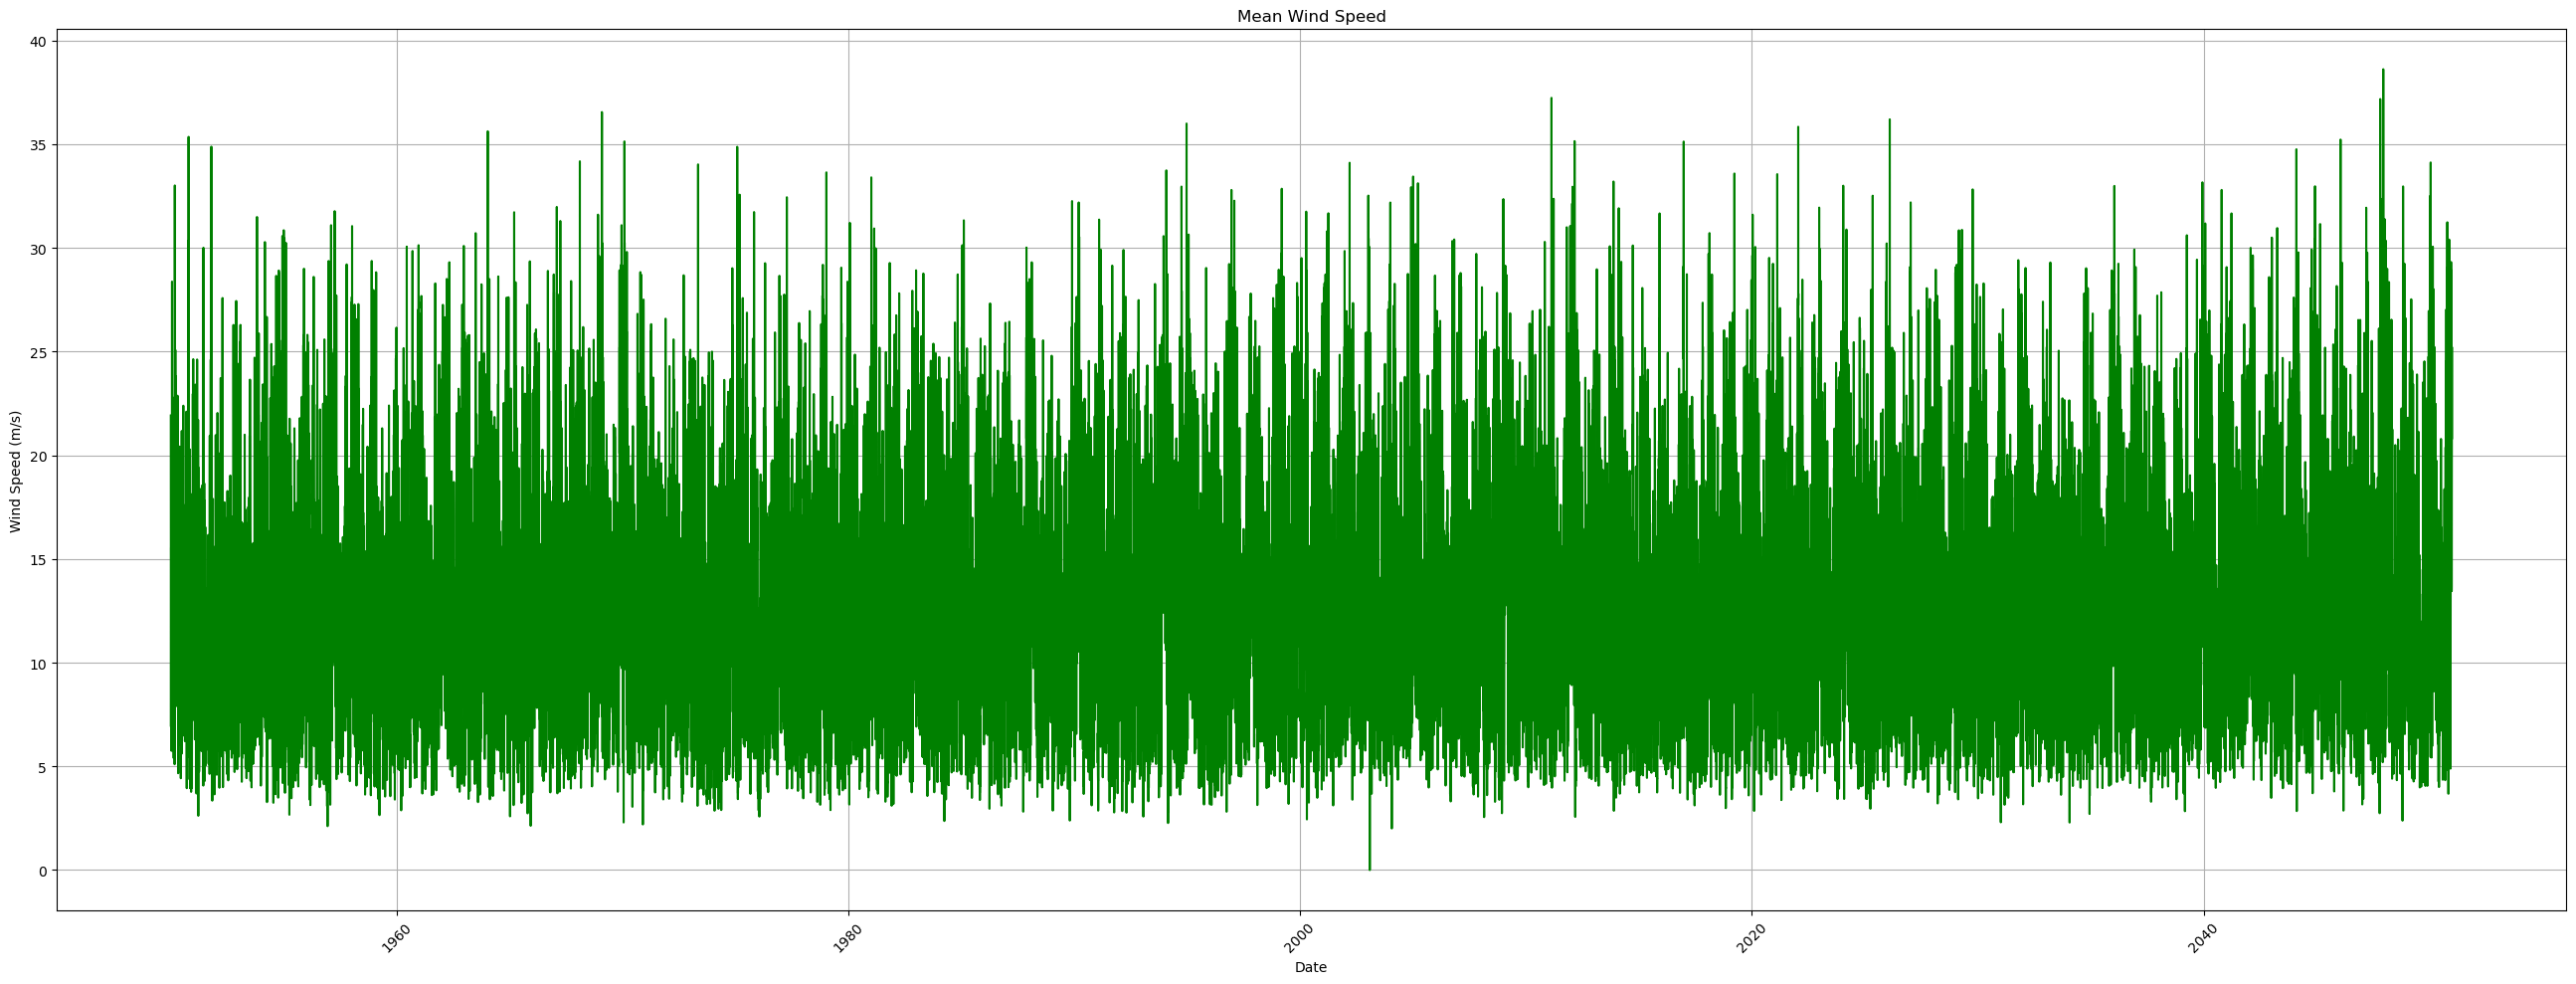

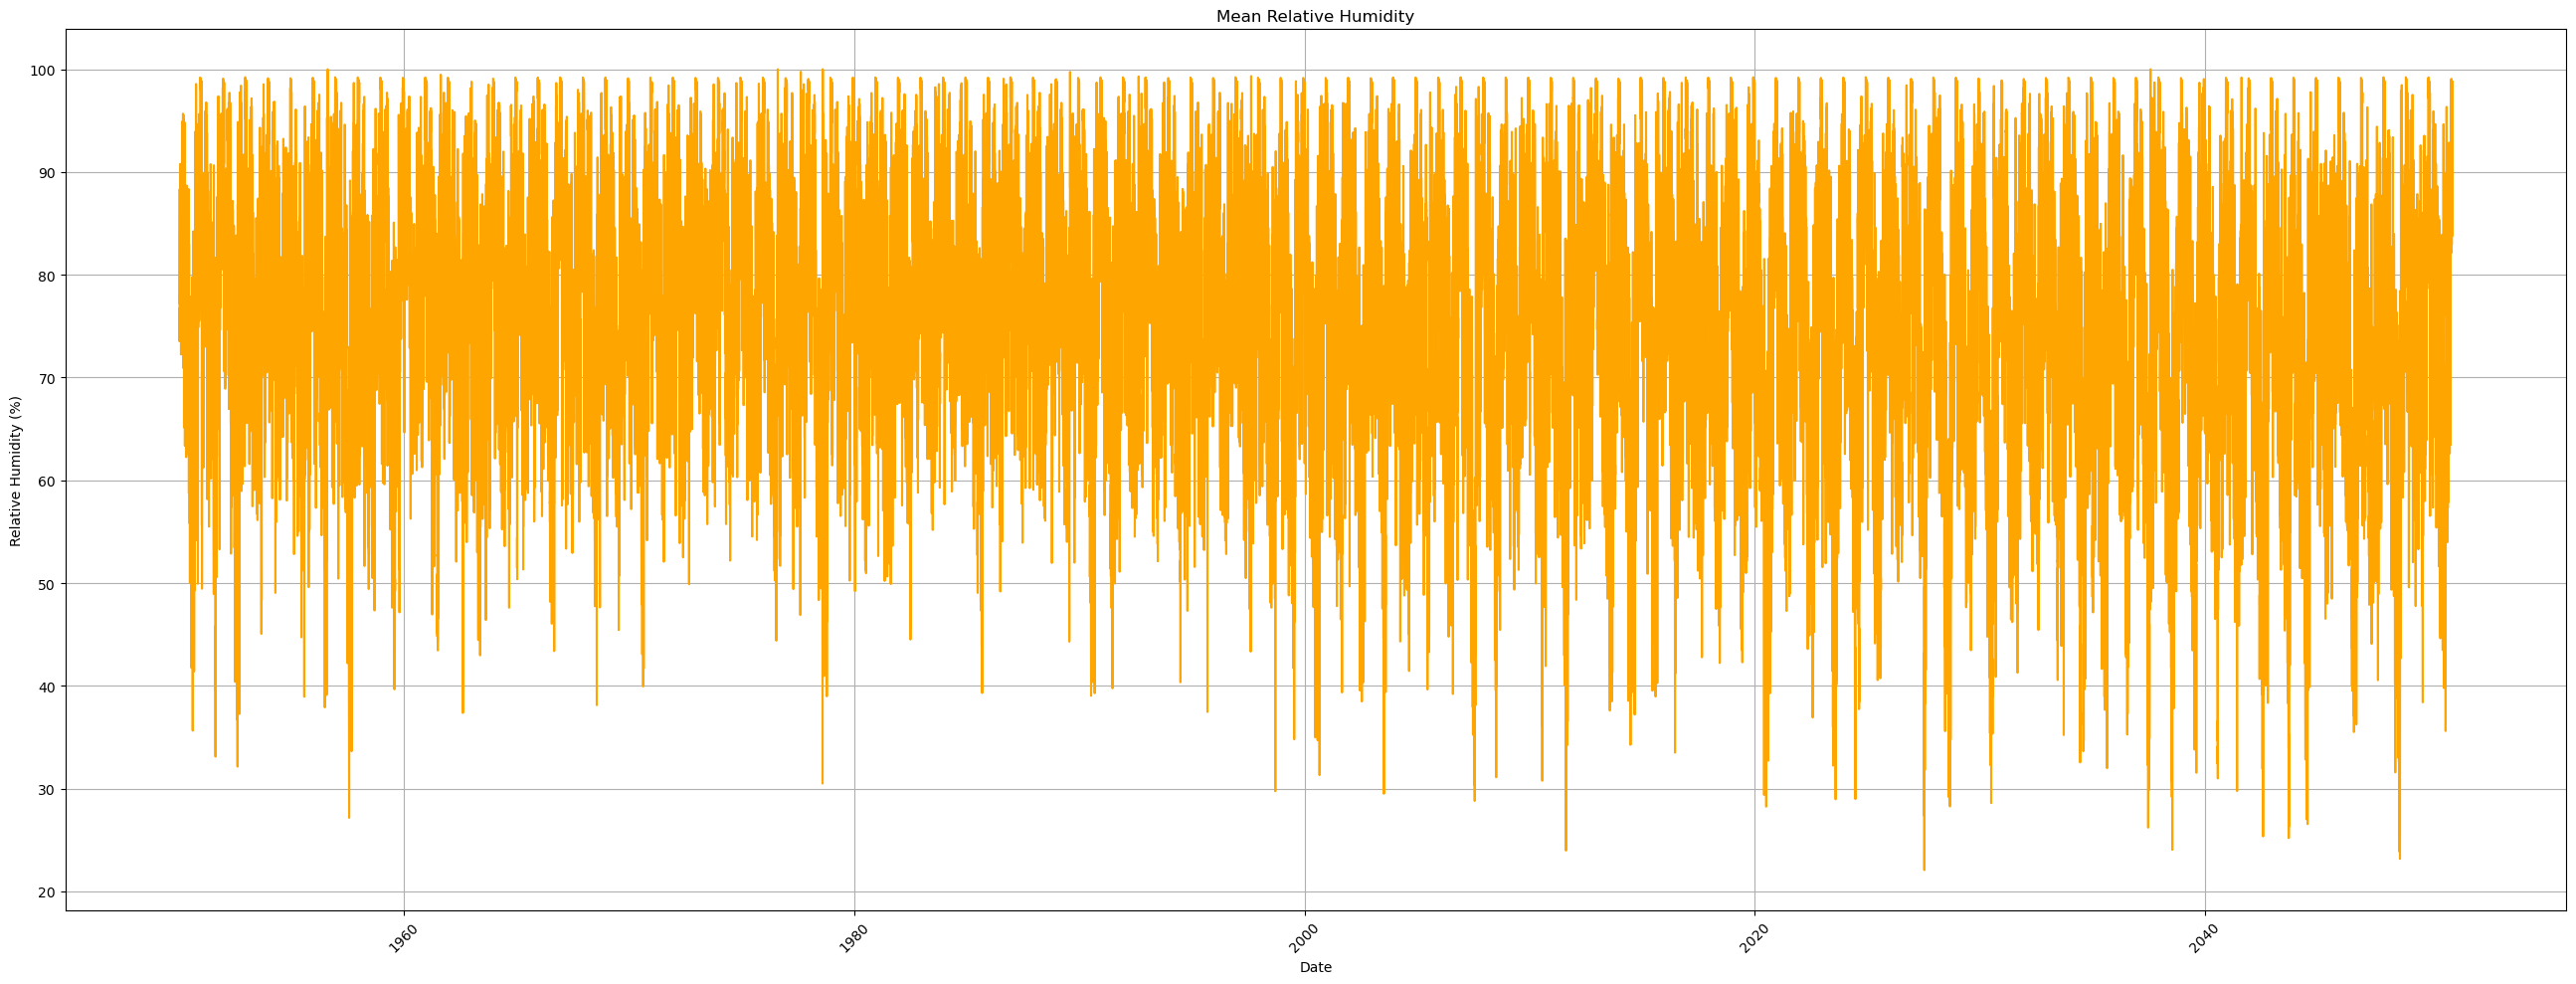

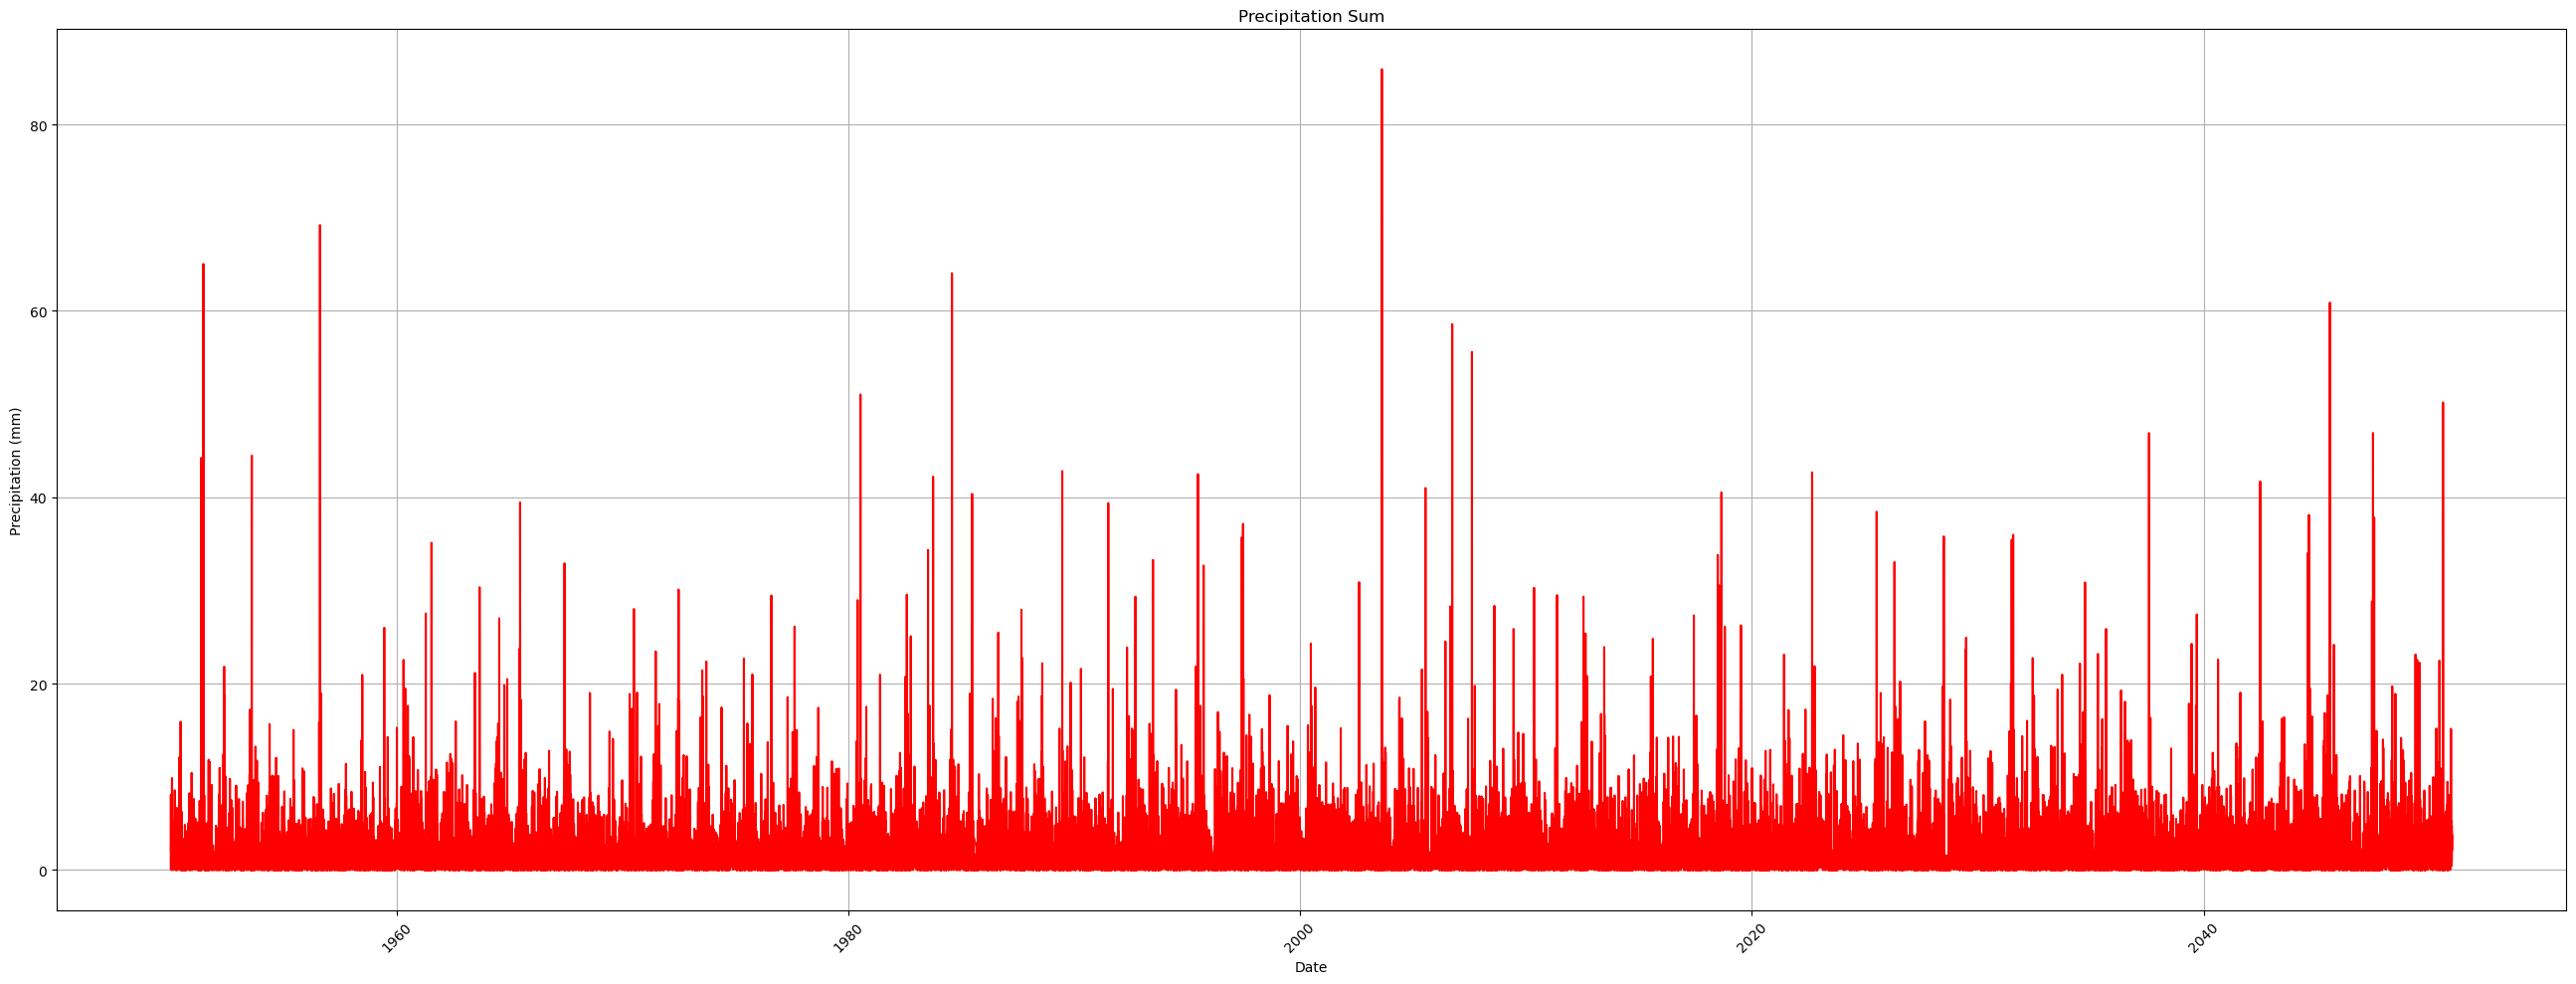

In [26]:
# Plotting mean temperature
plt.figure(figsize=(26, 10))
plt.plot(daily_dataframe['date'], daily_dataframe['temperature_2m_mean'], color='blue')
plt.title('Mean Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting mean wind speed
plt.figure(figsize=(26, 10))
plt.plot(daily_dataframe['date'], daily_dataframe['wind_speed_10m_mean'], color='green')
plt.title('Mean Wind Speed')
plt.xlabel('Date')
plt.ylabel('Wind Speed (m/s)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting mean relative humidity
plt.figure(figsize=(26, 10))
plt.plot(daily_dataframe['date'], daily_dataframe['relative_humidity_2m_mean'], color='orange')
plt.title('Mean Relative Humidity')
plt.xlabel('Date')
plt.ylabel('Relative Humidity (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting precipitation sum
plt.figure(figsize=(26, 10))
plt.plot(daily_dataframe['date'], daily_dataframe['precipitation_sum'], color='red')
plt.title('Precipitation Sum')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

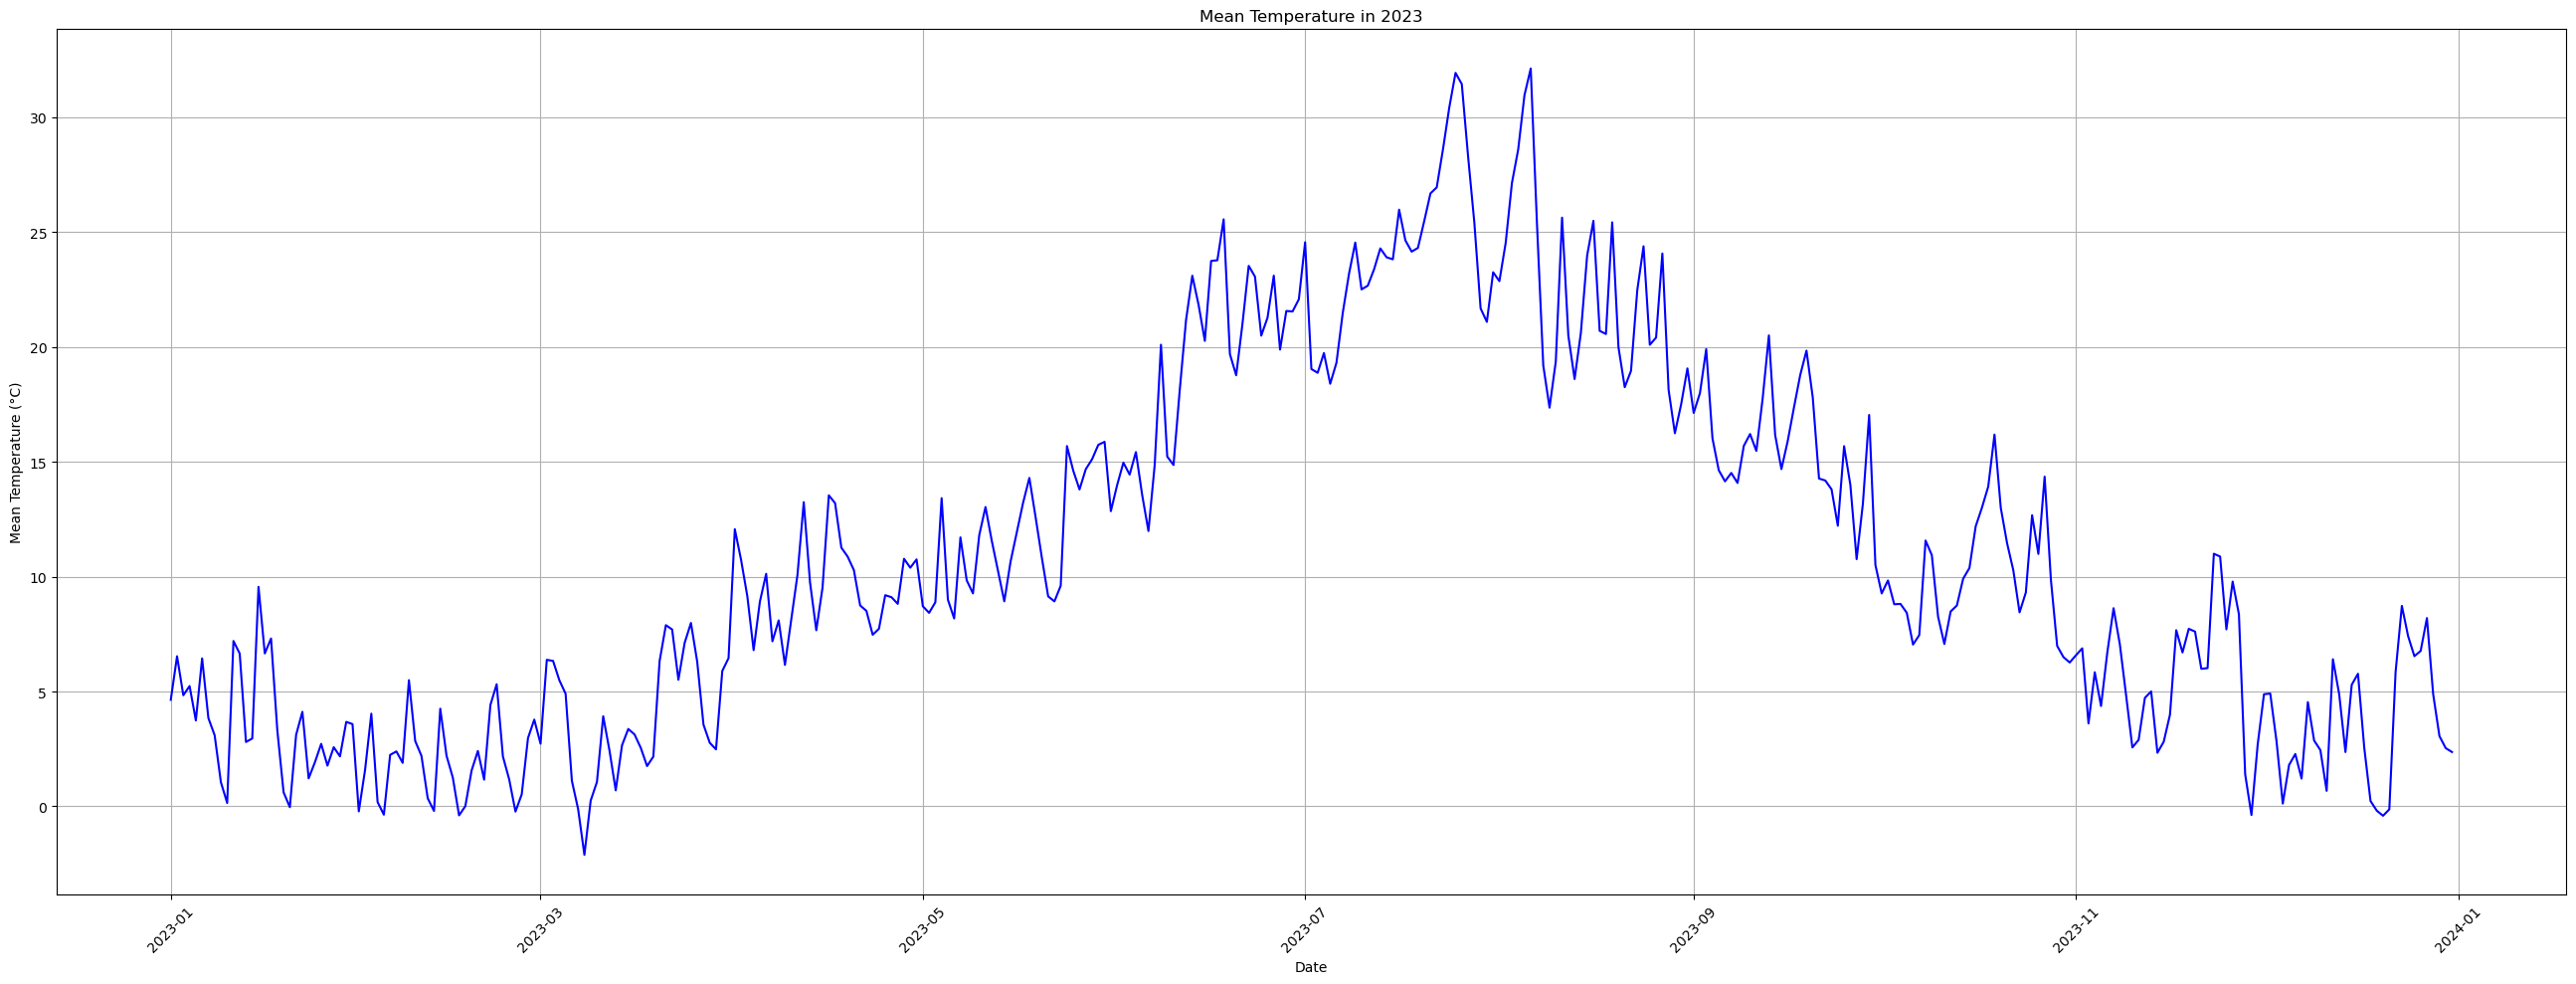

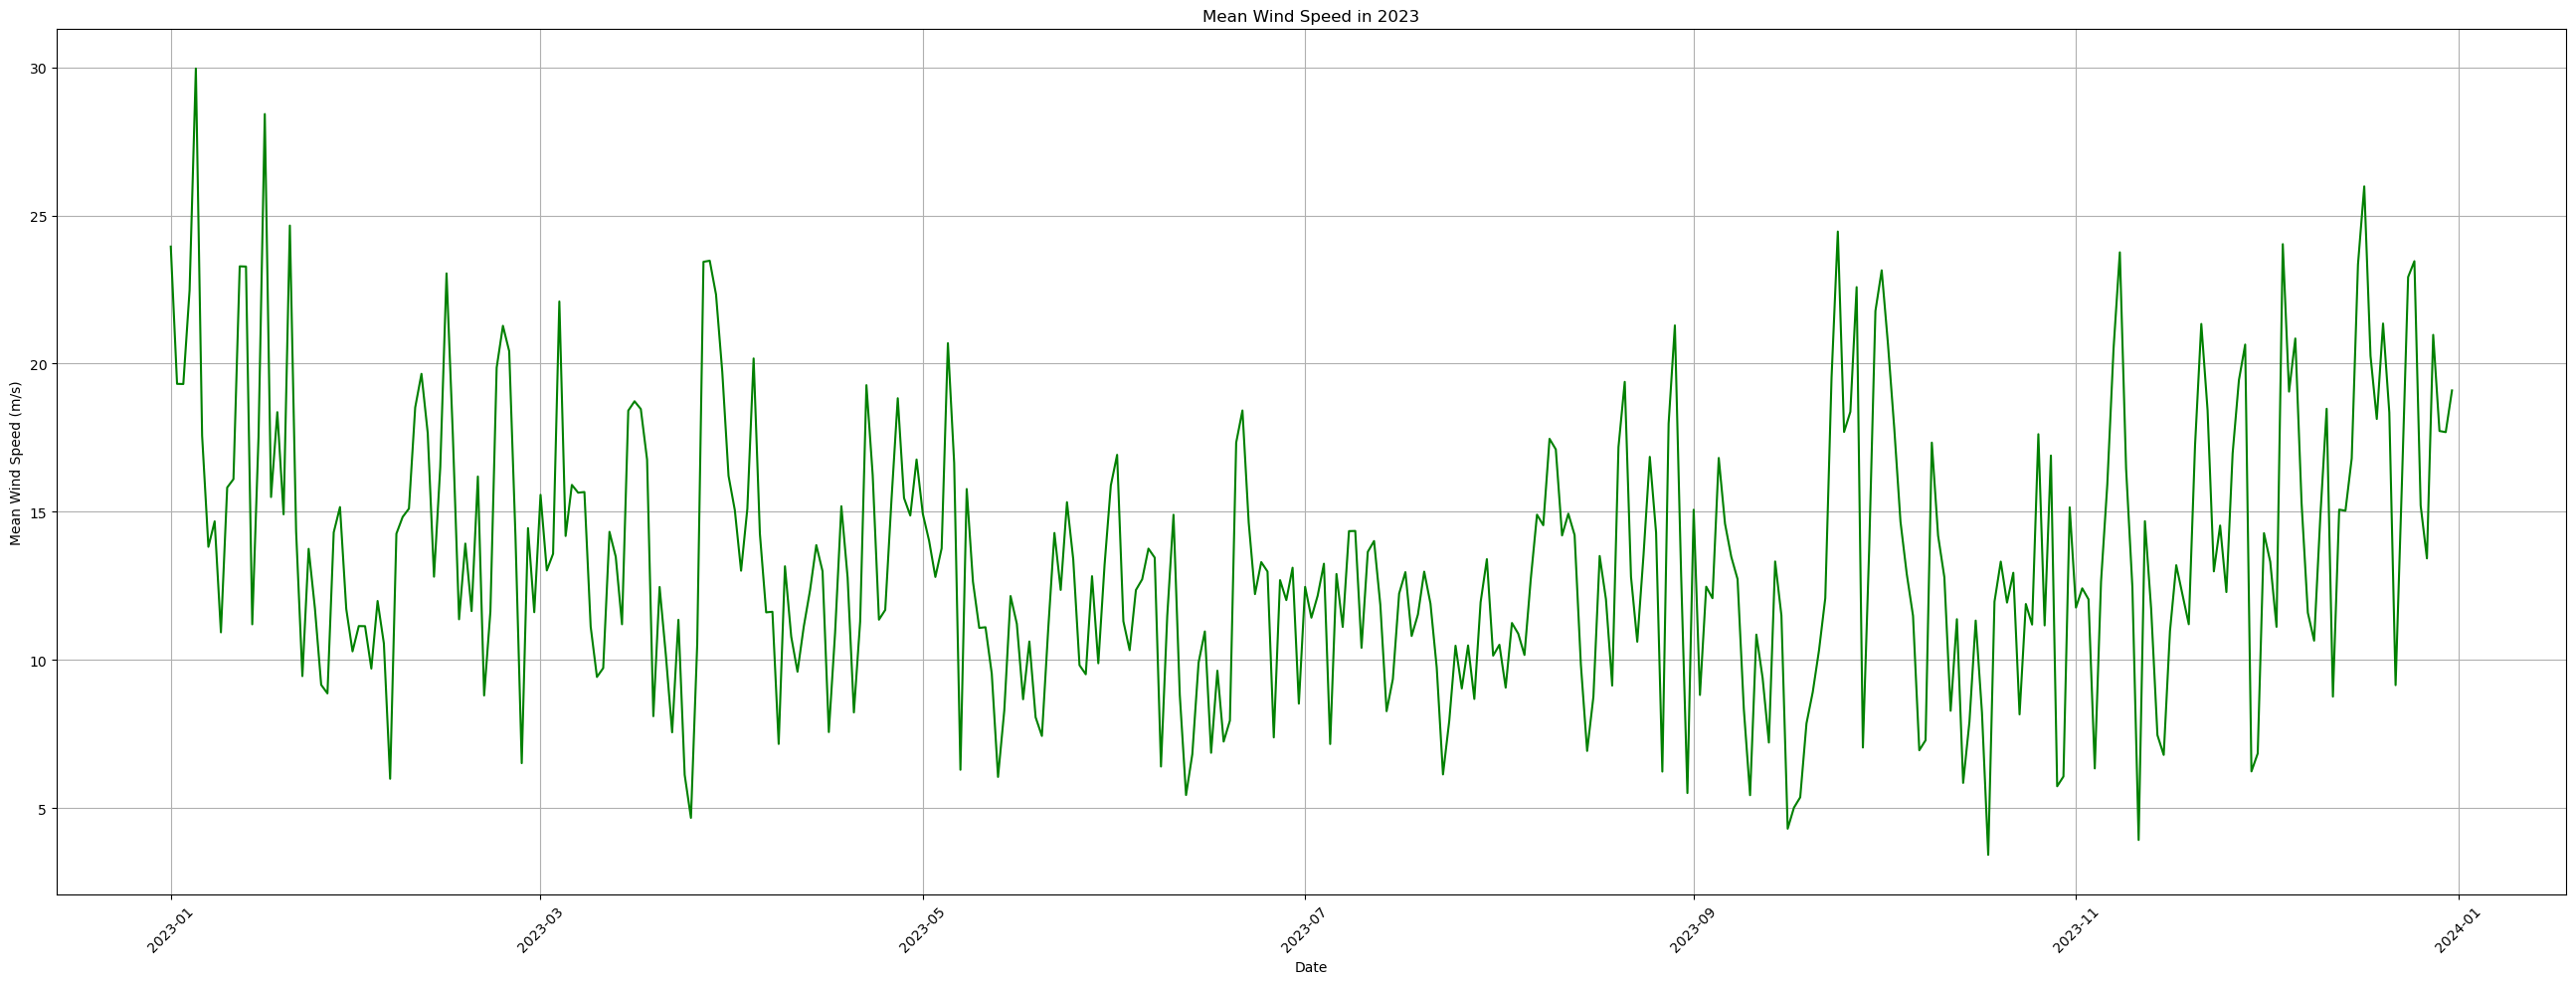

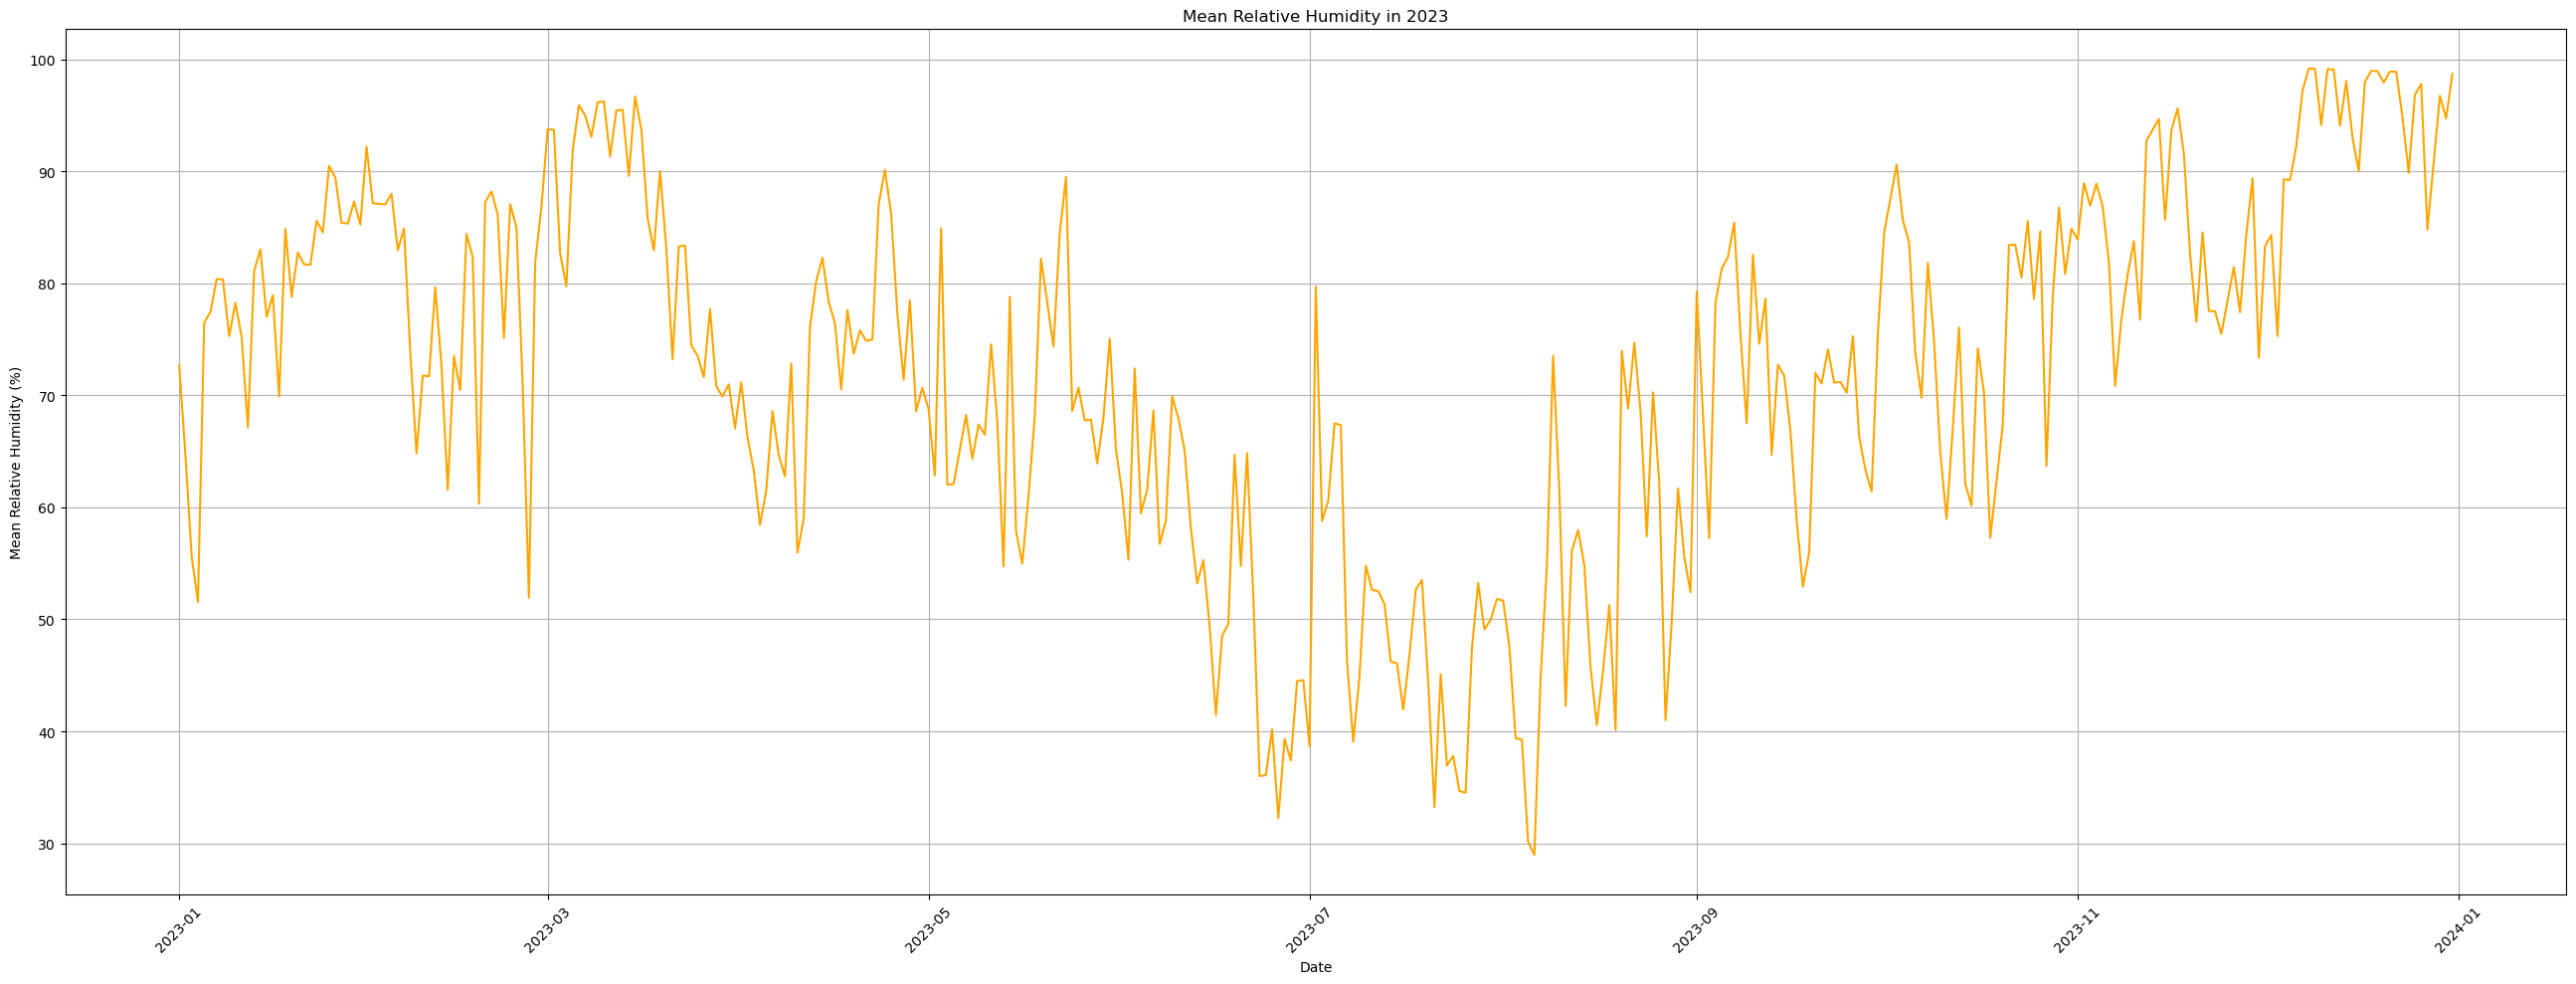

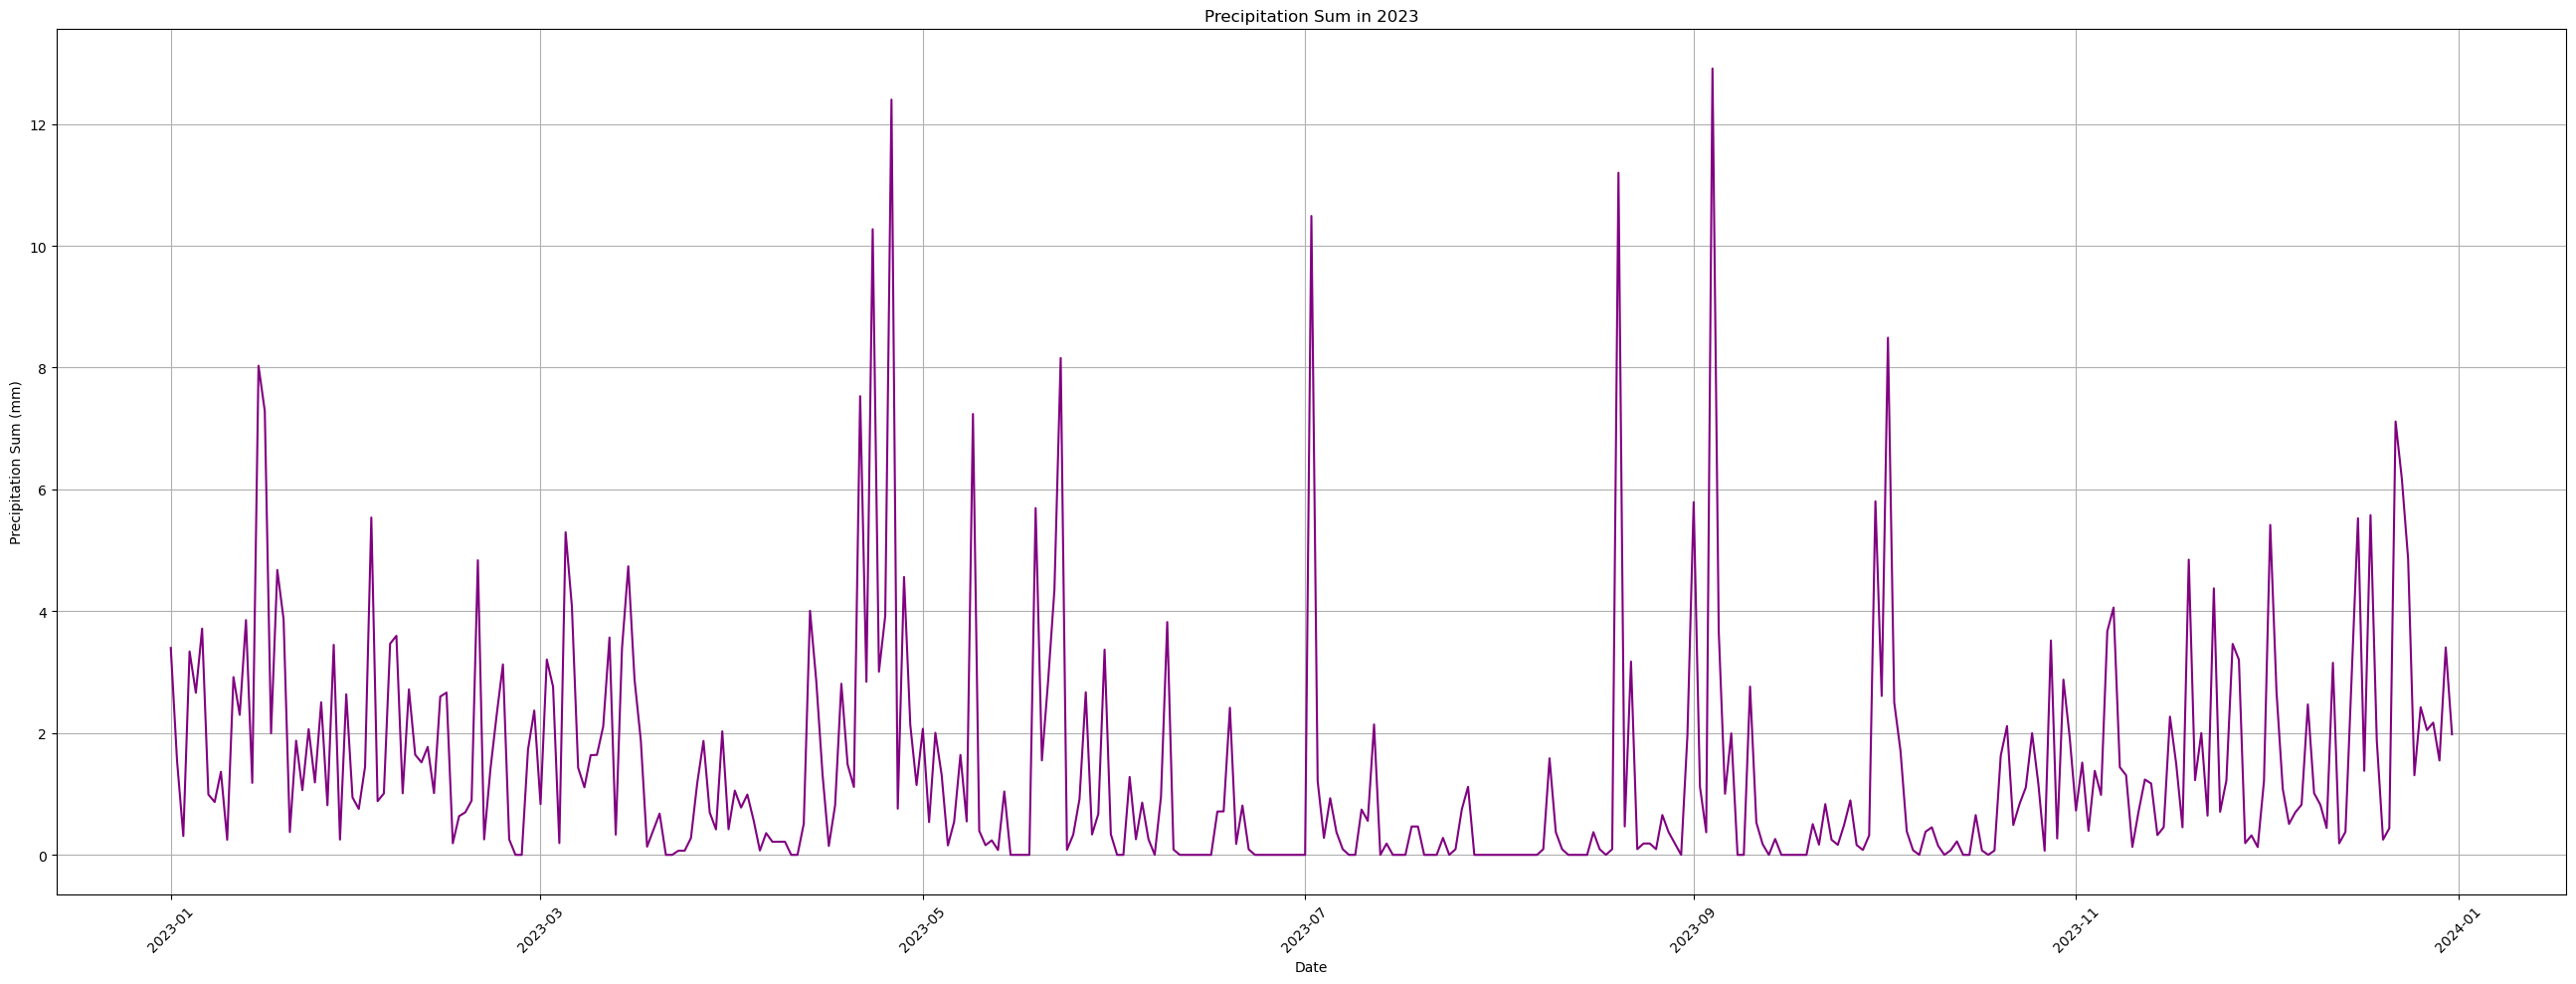

In [30]:
year_2023_data = daily_dataframe[daily_dataframe['date'].dt.year == 2023]

# Plotting Mean Temperature
plt.figure(figsize=(26, 10))
plt.plot(year_2023_data['date'], year_2023_data['temperature_2m_mean'], color='blue')
plt.title('Mean Temperature in 2023')
plt.xlabel('Date')
plt.ylabel('Mean Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting Mean Wind Speed
plt.figure(figsize=(26, 10))
plt.plot(year_2023_data['date'], year_2023_data['wind_speed_10m_mean'], color='green')
plt.title('Mean Wind Speed in 2023')
plt.xlabel('Date')
plt.ylabel('Mean Wind Speed (m/s)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting Mean Relative Humidity
plt.figure(figsize=(26, 10))
plt.plot(year_2023_data['date'], year_2023_data['relative_humidity_2m_mean'], color='orange')
plt.title('Mean Relative Humidity in 2023')
plt.xlabel('Date')
plt.ylabel('Mean Relative Humidity (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting Precipitation Sum
plt.figure(figsize=(26, 10))
plt.plot(year_2023_data['date'], year_2023_data['precipitation_sum'], color='purple')
plt.title('Precipitation Sum in 2023')
plt.xlabel('Date')
plt.ylabel('Precipitation Sum (mm)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()